# Problem Statement

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 threadpoolctl==3.3.0 -q --user

**Note:** After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [550]:
# To help with reading and manipulating data
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import scipy.stats as stats # mathematical algorithms and convenience functions
from scipy.stats import zscore

# To help with data visualization
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline
sns.set_style('whitegrid') # set style for visualization

#Statistical Tests
from statsmodels.stats.weightstats import ztest # Z-test
from scipy import stats # T-test
from scipy.stats import chisquare, chi2_contingency # Chi-Square
from scipy.stats import f_oneway # ANOVA (Analysis of Variance)
from scipy.stats import mannwhitneyu # Mann-Whitney U Test
from scipy.stats import wilcoxon # Wilcoxon Signed-Rank Test
from scipy.stats import kruskal # Kruskal-Wallis H Test
from scipy.stats import levene # Levene's Test
import statsmodels.stats.multicomp as stats_sm # statistical models, statistical tests, and statistical data exploration
import statsmodels.stats.proportion as stats_sp # statistical models, statistical tests, and statistical data exploration
import statsmodels.api as sm 


# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error,
    r2_score,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    classification_report
)

# To undersample and oversample the data
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import EditedNearestNeighbours 

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
#from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline #The imblearn pipeline allows to include sampling methods like RandomUnderSampler in the pipeline.
from sklearn.compose import ColumnTransformer

# To define maximum number of columns&rows to be displayed in a dataframe
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", 200)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings # ignore warnings
warnings.filterwarnings('ignore')


## Loading the dataset

In [4]:
#dataset read
path1='C:\\Users\\otroc\\OneDrive\\Documents\\Carlos\\Training\\DSBA\\Python\\Datasets\\M6_Project_Train.csv'
df_train = pd.read_csv(path1)
path2='C:\\Users\\otroc\\OneDrive\\Documents\\Carlos\\Training\\DSBA\\Python\\Datasets\\M6_Project_Test.csv'
df_test = pd.read_csv(path2)


## Data Overview

- Observations
- Sanity checks

In [5]:
df_train.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -4.465 -4.679  3.102  0.506 -0.221 -2.033 -2.911  0.051 -1.522  3.762   
1  3.366  3.653  0.910 -1.368  0.332  2.359  0.733 -4.332  0.566 -0.101   
2 -3.832 -5.824  0.634 -2.419 -1.774  1.017 -2.099 -3.173 -2.082  5.393   
3  1.618  1.888  7.046 -1.147  0.083 -1.530  0.207 -2.494  0.345  2.119   
4 -0.111  3.872 -3.758 -2.983  3.793  0.545  0.205  4.849 -1.855 -6.220   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.715  0.736  0.981  1.418 -3.376 -3.047  0.306  2.914  2.270  4.395   
1  1.914 -0.951 -1.255 -2.707  0.193 -4.769 -2.205  0.908  0.757 -5.834   
2 -0.771  1.107  1.144  0.943 -3.164 -4.248 -4.039  3.689  3.311  1.059   
3 -3.053  0.460  2.705 -0.636 -0.454 -3.174 -3.404 -1.282  1.582 -1.952   
4  1.998  4.724  0.709 -1.989 -2.633  4.184  2.245  3.734 -6.313 -5.380   

     V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
0 -2.388  0.646 -1.191  3.133  0.665 -2.511 -0.037  0.726 -3.982 -1.073   
1 -3.065  1.597 -1.757  1.766 -0.267  3.625  1.500 -0.586  0.783 -0.201   
2 -2.143  1.650 -1.661  1.680 -0.451 -4.551  3.739  1.134 -2.034  0.841   
3 -3.517 -1.206 -5.628 -1.818  2.124  5.295  4.748 -2.309 -3.963 -6.029   
4 -0.887  2.062  9.446  4.490 -3.945  4.582 -8.780 -3.383  5.107  6.788   

     V31    V32    V33     V34   V35    V36    V37    V38    V39    V40  \
0  1.667  3.060 -1.690   2.846 2.235  6.667  0.444 -2.369  2.951 -3.480   
1  0.025 -1.795  3.033  -2.468 1.895 -2.298 -1.731  5.909 -0.386  0.616   
2 -1.600 -0.257  0.804   4.086 2.292  5.361  0.352  2.940  3.839 -4.309   
3  4.949 -3.584 -2.577   1.364 0.623  5.550 -1.527  0.139  3.101 -1.277   
4  2.044  8.266  6.629 -10.069 1.223 -3.230  1.687 -2.164 -3.645  6.510   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0

In [6]:
df_test.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -0.613 -3.820  2.202  1.300 -1.185 -4.496 -1.836  4.723  1.206 -0.342   
1  0.390 -0.512  0.527 -2.577 -1.017  2.235 -0.441 -4.406 -0.333  1.967   
2 -0.875 -0.641  4.084 -1.590  0.526 -1.958 -0.695  1.347 -1.732  0.466   
3  0.238  1.459  4.015  2.534  1.197 -3.117 -0.924  0.269  1.322  0.702   
4  5.828  2.768 -1.235  2.809 -1.642 -1.407  0.569  0.965  1.918 -2.775   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.123  1.017  4.819  3.269 -2.984  1.387  2.032 -0.512 -1.023  7.339   
1  1.797  0.410  0.638 -1.390 -1.883 -5.018 -3.827  2.418  1.762 -3.242   
2 -4.928  3.565 -0.449 -0.656 -0.167 -1.630  2.292  2.396  0.601  1.794   
3 -5.578 -0.851  2.591  0.767 -2.391 -2.342  0.572 -0.934  0.509  1.211   
4 -0.530  1.375 -0.651 -1.679 -0.379 -4.443  3.894 -0.608  2.945  0.367   

     V21   V22    V23    V24    V25    V26    V27    V28    V29    V30    V31  \
0 -2.242 0.155  2.054 -2.772  1.851 -1.789 -0.277 -1.255 -3.833 -1.505  1.587   
1 -3.193 1.857 -1.708  0.633 -0.588  0.084  3.014 -0.182  0.224  0.865 -1.782   
2 -2.120 0.482 -0.841  1.790  1.874  0.364 -0.169 -0.484 -2.119 -2.157  2.907   
3 -3.260 0.105 -0.659  1.498  1.100  4.143 -0.248 -1.137 -5.356 -4.546  3.809   
4 -5.789 4.598  4.450  3.225  0.397  0.248 -2.362  1.079 -0.473  2.243 -3.591   

     V32    V33    V34   V35    V36    V37     V38    V39    V40  Target  
0  2.291 -5.411  0.870 0.574  4.157  1.428 -10.511  0.455 -1.448       0  
1 -2.475  2.494  0.315 2.059  0.684 -0.485   5.128  1.721 -1.488       0  
2 -1.319 -2.997  0.460 0.620  5.632  1.324  -1.752  1.808  1.676       0  
3  3.518 -3.074 -0.284 0.955  3.029 -1.367  -3.412  0.906 -2.451       0  
4  1.774 -1.502 -2.227 4.777 -6.560 -0.806  -0.276 -3.858 -0.538       0

In [7]:
df_train.tail()

V1      V2     V3     V4     V5     V6     V7     V8     V9    V10  \
19995 -2.071  -1.088 -0.796 -3.012 -2.288  2.807  0.481  0.105 -0.587 -2.899   
19996  2.890   2.483  5.644  0.937 -1.381  0.412 -1.593 -5.762  2.150  0.272   
19997 -3.897  -3.942 -0.351 -2.417  1.108 -1.528 -3.520  2.055 -0.234 -0.358   
19998 -3.187 -10.052  5.696 -4.370 -5.355 -1.873 -3.947  0.679 -2.389  5.457   
19999 -2.687   1.961  6.137  2.600  2.657 -4.291 -2.344  0.974 -1.027  0.497   

         V11    V12   V13    V14    V15     V16    V17    V18    V19    V20  \
19995  8.868  1.717 1.358 -1.777  0.710   4.945 -3.100 -1.199 -1.085 -0.365   
19996 -2.095 -1.526 0.072 -3.540 -2.762 -10.632 -0.495  1.720  3.872 -1.210   
19997 -3.782  2.180 6.112  1.985 -8.330  -1.639 -0.915  5.672 -3.924  2.133   
19998  1.583  3.571 9.227  2.554 -7.039  -0.994 -9.665  1.155  3.877  3.524   
19999 -9.589  3.177 1.055 -1.416 -4.669  -5.405  3.720  2.893  2.329  1.458   

         V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
19995  3.131 -3.948 -3.578 -8.139 -1.937 -1.328 -0.403 -1.735  9.996  6.955   
19996 -8.222  2.121 -5.492  1.452  1.450  3.685  1.077 -0.384 -0.839 -0.748   
19997 -4.502  2.777  5.728  1.620 -1.700 -0.042 -2.923 -2.760 -2.254  2.552   
19998 -7.015 -0.132 -3.446 -4.801 -0.876 -3.812  5.422 -3.732  0.609  5.256   
19999 -6.429  1.818  0.806  7.786  0.331  5.257 -4.867 -0.819 -5.667 -2.861   

         V31    V32    V33    V34    V35    V36    V37    V38   V39    V40  \
19995 -3.938 -8.274  5.745  0.589 -0.650 -3.043  2.216  0.609 0.178  2.928   
19996 -1.089 -4.159  1.181 -0.742  5.369 -0.693 -1.669  3.660 0.820 -1.987   
19997  0.982  7.112  1.476 -3.954  1.856  5.029  2.083 -6.409 1.477 -0.874   
19998  1.915  0.403  3.164  3.752  8.530  8.451  0.204 -7.130 4.249 -6.112   
19999  4.674  6.621 -1.989 -1.349  3.952  5.450 -0.455 -2.202 1.678 -1.974   

       Target  
19995       1  
19996       0  
19997       0  
19998       0  
19999       0

In [8]:
df_test.tail()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
4995 -5.120  1.635  1.251  4.036  3.291 -2.932 -1.329  1.754 -2.985  1.249   
4996 -5.172  1.172  1.579  1.220  2.530 -0.669 -2.618 -2.001  0.634 -0.579   
4997 -1.114 -0.404 -1.765 -5.879  3.572  3.711 -2.483 -0.308 -0.922 -2.999   
4998 -1.703  0.615  6.221 -0.104  0.956 -3.279 -1.634 -0.104  1.388 -1.066   
4999 -0.604  0.960 -0.721  8.230 -1.816 -2.276 -2.575 -1.041  4.130 -2.731   

        V11    V12    V13    V14    V15    V16    V17   V18    V19    V20  \
4995 -6.878  3.715 -2.512 -1.395 -2.554 -2.197  4.772 2.403  3.792  0.487   
4996 -3.671  0.460  3.321 -1.075 -7.113 -4.356 -0.001 3.698 -0.846 -0.222   
4997 -0.112 -1.977 -1.623 -0.945 -2.735 -0.813  0.610 8.149 -9.199 -3.872   
4998 -7.970  2.262  3.134 -0.486 -3.498 -4.562  3.136 2.536 -0.792  4.398   
4999 -3.292 -1.674  0.465 -1.646 -5.263 -7.988  6.480 0.226  4.963  6.752   

        V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
4995 -2.028  1.778  3.668 11.375 -1.977  2.252 -7.319  1.907 -3.734 -0.012   
4996 -3.645  0.736  0.926  3.278 -2.277  4.458 -4.543 -1.348 -1.779  0.352   
4997 -0.296  1.468  2.884  2.792 -1.136  1.198 -4.342 -2.869  4.124  4.197   
4998 -4.073 -0.038 -2.371 -1.542  2.908  3.215 -0.169 -1.541 -4.724 -5.525   
4999 -6.306  3.271  1.897  3.271 -0.637 -0.925 -6.759  2.990 -0.814  3.499   

        V31    V32    V33     V34    V35    V36    V37    V38    V39    V40  \
4995  2.120  9.979  0.063   0.217  3.036  2.109 -0.557  1.939  0.513 -2.694   
4996 -0.214  4.424  2.604  -2.152  0.917  2.157  0.467  0.470  2.197 -2.377   
4997  3.471  3.792  7.482 -10.061 -0.387  1.849  1.818 -1.246 -1.261  7.475   
4998  1.668 -4.100 -5.949   0.550 -1.574  6.824  2.139 -4.036  3.436  0.579   
4999 -8.435  2.370 -1.062   0.791  4.952 -7.441 -0.070 -0.918 -2.291 -5.363   

      Target  
4995       0  
4996       0  
4997       0  
4998       0  
4999       0

In [10]:
print("There are", df_train.shape[0], 'rows and', df_train.shape[1], "columns on 'df_train' data") # number of observations and features

There are 20000 rows and 41 columns on 'df_train' data


In [11]:
print("There are", df_test.shape[0], 'rows and', df_test.shape[1], "columns on 'df_test' data") # number of observations and features

There are 5000 rows and 41 columns on 'df_test' data


**Notes**
* It is verified that the available data matches the data declared in the problem statement: "The data has 40 predictors, 20,000 observations in the training set and 5,000 in the test set."

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

**Notes**
* All variables are numerical

In [15]:
df_train.describe().T

count   mean   std     min    25%    50%    75%    max
V1     19982.000 -0.272 3.442 -11.876 -2.737 -0.748  1.840 15.493
V2     19982.000  0.440 3.151 -12.320 -1.641  0.472  2.544 13.089
V3     20000.000  2.485 3.389 -10.708  0.207  2.256  4.566 17.091
V4     20000.000 -0.083 3.432 -15.082 -2.348 -0.135  2.131 13.236
V5     20000.000 -0.054 2.105  -8.603 -1.536 -0.102  1.340  8.134
V6     20000.000 -0.995 2.041 -10.227 -2.347 -1.001  0.380  6.976
V7     20000.000 -0.879 1.762  -7.950 -2.031 -0.917  0.224  8.006
V8     20000.000 -0.548 3.296 -15.658 -2.643 -0.389  1.723 11.679
V9     20000.000 -0.017 2.161  -8.596 -1.495 -0.068  1.409  8.138
V10    20000.000 -0.013 2.193  -9.854 -1.411  0.101  1.477  8.108
V11    20000.000 -1.895 3.124 -14.832 -3.922 -1.921  0.119 11.826
V12    20000.000  1.605 2.930 -12.948 -0.397  1.508  3.571 15.081
V13    20000.000  1.580 2.875 -13.228 -0.224  1.637  3.460 15.420
V14    20000.000 -0.951 1.790  -7.739 -2.171 -0.957  0.271  5.671
V15    20000.000 -2.415 3.355 -16.417 -4.415 -2.383 -0.359 12.246
V16    20000.000 -2.925 4.222 -20.374 -5.634 -2.683 -0.095 13.583
V17    20000.000 -0.134 3.345 -14.091 -2.216 -0.015  2.069 16.756
V18    20000.000  1.189 2.592 -11.644 -0.404  0.883  2.572 13.180
V19    20000.000  1.182 3.397 -13.492 -1.050  1.279  3.493 13.238
V20    20000.000  0.024 3.669 -13.923 -2.433  0.033  2.512 16.052
V21    20000.000 -3.611 3.568 -17.956 -5.930 -3.533 -1.266 13.840
V22    20000.000  0.952 1.652 -10.122 -0.118  0.975  2.026  7.410
V23    20000.000 -0.366 4.032 -14.866 -3.099 -0.262  2.452 14.459
V24    20000.000  1.134 3.912 -16.387 -1.468  0.969  3.546 17.163
V25    20000.000 -0.002 2.017  -8.228 -1.365  0.025  1.397  8.223
V26    20000.000  1.874 3.435 -11.834 -0.338  1.951  4.130 16.836
V27    20000.000 -0.612 4.369 -14.905 -3.652 -0.885  2.189 17.560
V28    20000.000 -0.883 1.918  -9.269 -2.171 -0.891  0.376  6.528
V29    20000.000 -0.986 2.684 -12.579 -2.787 -1.176  0.630 10.722
V30    20000.000 -0.016 3.005 -14.796 -1.867  0.184  2.036 12.506
V31    20000.000  0.487 3.461 -13.723 -1.818  0.490  2.731 17.255
V32    20000.000  0.304 5.500 -19.877 -3.420  0.052  3.762 23.633
V33    20000.000  0.050 3.575 -16.898 -2.243 -0.066  2.255 16.692
V34    20000.000 -0.463 3.184 -17.985 -2.137 -0.255  1.437 14.358
V35    20000.000  2.230 2.937 -15.350  0.336  2.099  4.064 15.291
V36    20000.000  1.515 3.801 -14.833 -0.944  1.567  3.984 19.330
V37    20000.000  0.011 1.788  -5.478 -1.256 -0.128  1.176  7.467
V38    20000.000 -0.344 3.948 -17.375 -2.988 -0.317  2.279 15.290
V39    20000.000  0.891 1.753  -6.439 -0.272  0.919  2.058  7.760
V40    20000.000 -0.876 3.012 -11.024 -2.940 -0.921  1.120 10.654
Target 20000.000  0.056 0.229   0.000  0.000  0.000  0.000  1.000

In [16]:
df_test.describe().T

count   mean   std     min    25%    50%    75%    max
V1     4995.000 -0.278 3.466 -12.382 -2.744 -0.765  1.831 13.504
V2     4994.000  0.398 3.140 -10.716 -1.649  0.427  2.444 14.079
V3     5000.000  2.552 3.327  -9.238  0.315  2.260  4.587 15.315
V4     5000.000 -0.049 3.414 -14.682 -2.293 -0.146  2.166 12.140
V5     5000.000 -0.080 2.111  -7.712 -1.615 -0.132  1.341  7.673
V6     5000.000 -1.042 2.005  -8.924 -2.369 -1.049  0.308  5.068
V7     5000.000 -0.908 1.769  -8.124 -2.054 -0.940  0.212  7.616
V8     5000.000 -0.575 3.332 -12.253 -2.642 -0.358  1.713 10.415
V9     5000.000  0.030 2.174  -6.785 -1.456 -0.080  1.450  8.851
V10    5000.000  0.019 2.145  -8.171 -1.353  0.166  1.511  6.599
V11    5000.000 -2.009 3.112 -13.152 -4.050 -2.043  0.044  9.956
V12    5000.000  1.576 2.907  -8.164 -0.450  1.488  3.563 12.984
V13    5000.000  1.622 2.883 -11.548 -0.126  1.719  3.465 12.620
V14    5000.000 -0.921 1.803  -7.814 -2.111 -0.896  0.272  5.734
V15    5000.000 -2.452 3.387 -15.286 -4.479 -2.417 -0.433 11.673
V16    5000.000 -3.019 4.264 -20.986 -5.648 -2.774 -0.178 13.976
V17    5000.000 -0.104 3.337 -13.418 -2.228  0.047  2.112 19.777
V18    5000.000  1.196 2.586 -12.214 -0.409  0.881  2.604 13.642
V19    5000.000  1.210 3.385 -14.170 -1.026  1.296  3.526 12.428
V20    5000.000  0.138 3.657 -13.720 -2.325  0.193  2.540 13.871
V21    5000.000 -3.664 3.578 -16.341 -5.944 -3.663 -1.330 11.047
V22    5000.000  0.962 1.640  -6.740 -0.048  0.986  2.029  7.505
V23    5000.000 -0.422 4.057 -14.422 -3.163 -0.279  2.426 13.181
V24    5000.000  1.089 3.968 -12.316 -1.623  0.913  3.537 17.806
V25    5000.000  0.061 2.010  -6.770 -1.298  0.077  1.428  6.557
V26    5000.000  1.847 3.400 -11.414 -0.242  1.917  4.156 17.528
V27    5000.000 -0.552 4.403 -13.177 -3.663 -0.872  2.247 17.290
V28    5000.000 -0.868 1.926  -7.933 -2.160 -0.931  0.421  7.416
V29    5000.000 -1.096 2.655  -9.988 -2.861 -1.341  0.522 14.039
V30    5000.000 -0.119 3.023 -12.438 -1.997  0.112  1.946 10.315
V31    5000.000  0.469 3.446 -11.263 -1.822  0.486  2.779 12.559
V32    5000.000  0.233 5.586 -17.244 -3.556 -0.077  3.752 26.539
V33    5000.000 -0.080 3.539 -14.904 -2.348 -0.160  2.099 13.324
V34    5000.000 -0.393 3.166 -14.700 -2.010 -0.172  1.465 12.146
V35    5000.000  2.211 2.948 -12.261  0.322  2.112  4.032 13.489
V36    5000.000  1.595 3.775 -12.736 -0.866  1.703  4.104 17.116
V37    5000.000  0.023 1.785  -5.079 -1.241 -0.110  1.238  6.810
V38    5000.000 -0.406 3.969 -15.335 -2.984 -0.381  2.288 13.065
V39    5000.000  0.939 1.717  -5.451 -0.208  0.959  2.131  7.182
V40    5000.000 -0.932 2.978 -10.076 -2.987 -1.003  1.080  8.698
Target 5000.000  0.056 0.231   0.000  0.000  0.000  0.000  1.000

**Notes**
* Negative values ​​observed in the data. These are considered as real values ​​obtained from the sensors. Therefore, they do not need to be processed (imputed/discarded) and will be used as is.

In [17]:
df_train['Target'].value_counts()

0    18890
1     1110
Name: Target, dtype: int64

In [18]:
df_test['Target'].value_counts()

0    4718
1     282
Name: Target, dtype: int64

In [19]:
df_train['Target'].value_counts(normalize=True)

0   0.945
1   0.056
Name: Target, dtype: float64

In [20]:
df_test['Target'].value_counts(normalize=True)

0   0.944
1   0.056
Name: Target, dtype: float64

**Notes**
* Target data is unbalanced, presenting  94.5% "No Failure" and 5.6% "Failure" observations.

In [55]:
# Duplicates
df_train.duplicated().sum() # Checking for duplicate entries in the data

0

In [57]:
# Duplicates
df_test.duplicated().sum() # Checking for duplicate entries in the data

0

In [58]:
# Missing values
df_train.isnull().sum() # Checking for missing values in the data

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [59]:
# Missing values
df_test.isnull().sum() # Checking for missing values in the data

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

**Notes**
* There is no duplicates
* There are missing values on variables v1 and v2

## Consolidate notes on Data Overview
* It is verified that the available data matches the data declared in the problem statement: "The data has 40 predictors, 20,000 observations in the training set and 5,000 in the test set."
* All variables are numerical
* Negative values ​​observed in the data. These are considered as real values ​​obtained from the sensors. Therefore, they do not need to be processed (imputed/discarded) and will be used as is.
* Target data is unbalanced, presenting  94.5% "No Failure" and 5.6% "Failure" observations.
* There is no duplicates
* There are missing values on variables v1 and v2


# Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [24]:
def univariate_numerical(data):
    '''
    Function to generate two plots for each numerical variable
    Histplot for variable distribution
    Boxplot for statistical summary 
    '''
    # Select numerical columns
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    
    # Determine the number of rows and columns
    num_vars = len(numerical_cols)
    num_cols = 4
    num_rows = int(np.ceil(num_vars * 2 / num_cols))
    
    # Create a figure with the specified size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each variable with a histplot and a boxplot
    for i, col in enumerate(numerical_cols):
        mean_value = data[col].mean()
        
        # Histplot with KDE
        sns.histplot(data[col], kde=True, ax=axes[i*2])
        axes[i*2].axvline(mean_value, color='r', linestyle='--')
        axes[i*2].set_title(f'Distribution of {col}')
        axes[i*2].text(mean_value, axes[i*2].get_ylim()[1]*0.8, f'Mean: {mean_value:.2f}', color='r', va='baseline', ha='left',rotation=90)
        
        # Boxplot
        sns.boxplot(y=data[col], ax=axes[i*2 + 1])
        axes[i*2 + 1].axhline(mean_value, color='r', linestyle='--')
        axes[i*2 + 1].set_title(f'Boxplot of {col}')
        axes[i*2 + 1].text(axes[i*2 + 1].get_xlim()[1]*0.8, mean_value, f'mean: {mean_value:.2f}', color='r', va='baseline', ha='right')
    
    # Hide any remaining empty subplots
    for j in range(num_vars * 2, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

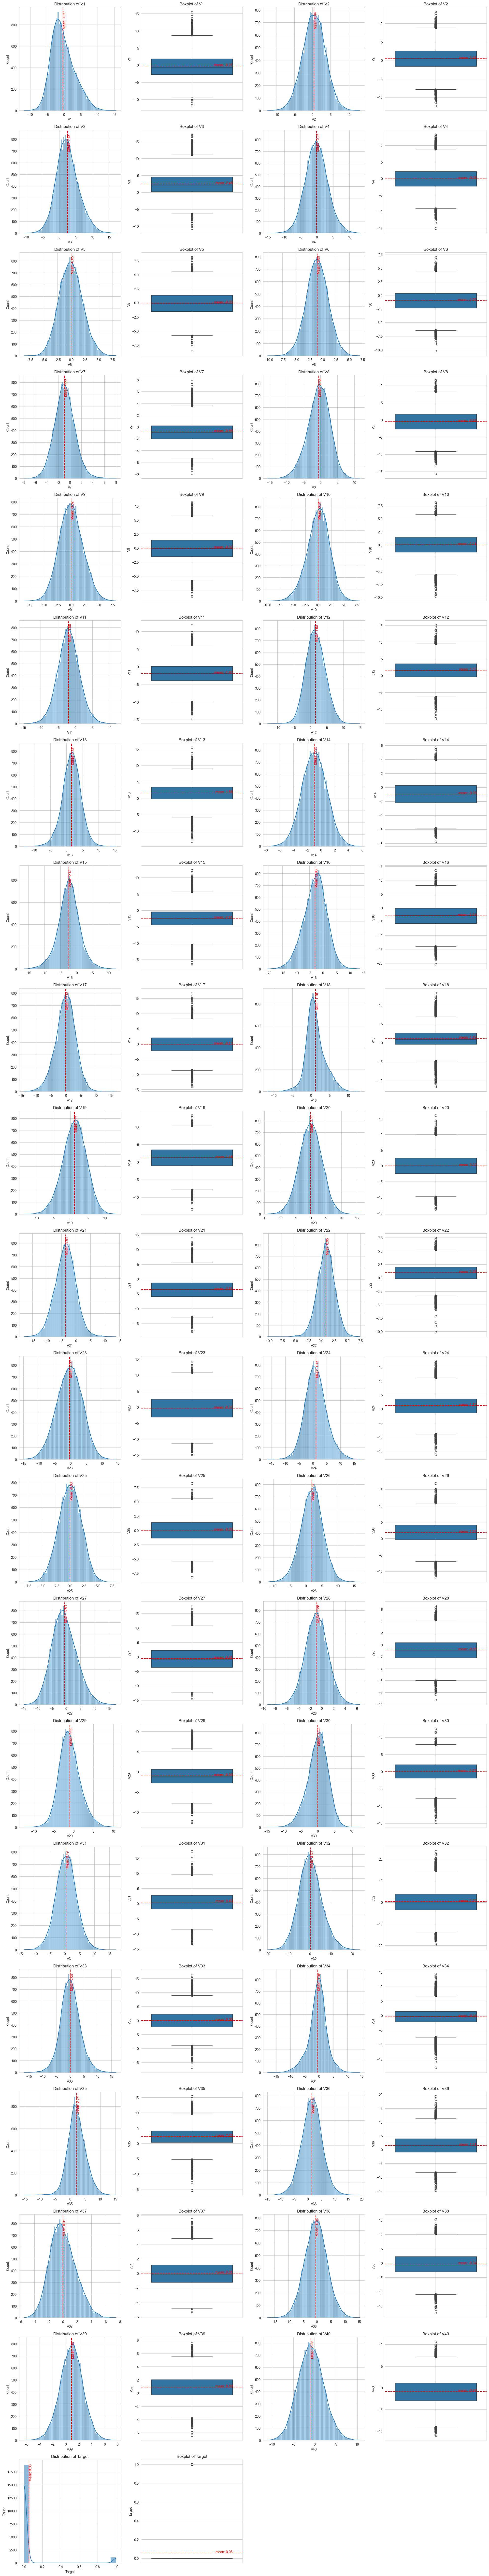

In [25]:
univariate_numerical(df_train)

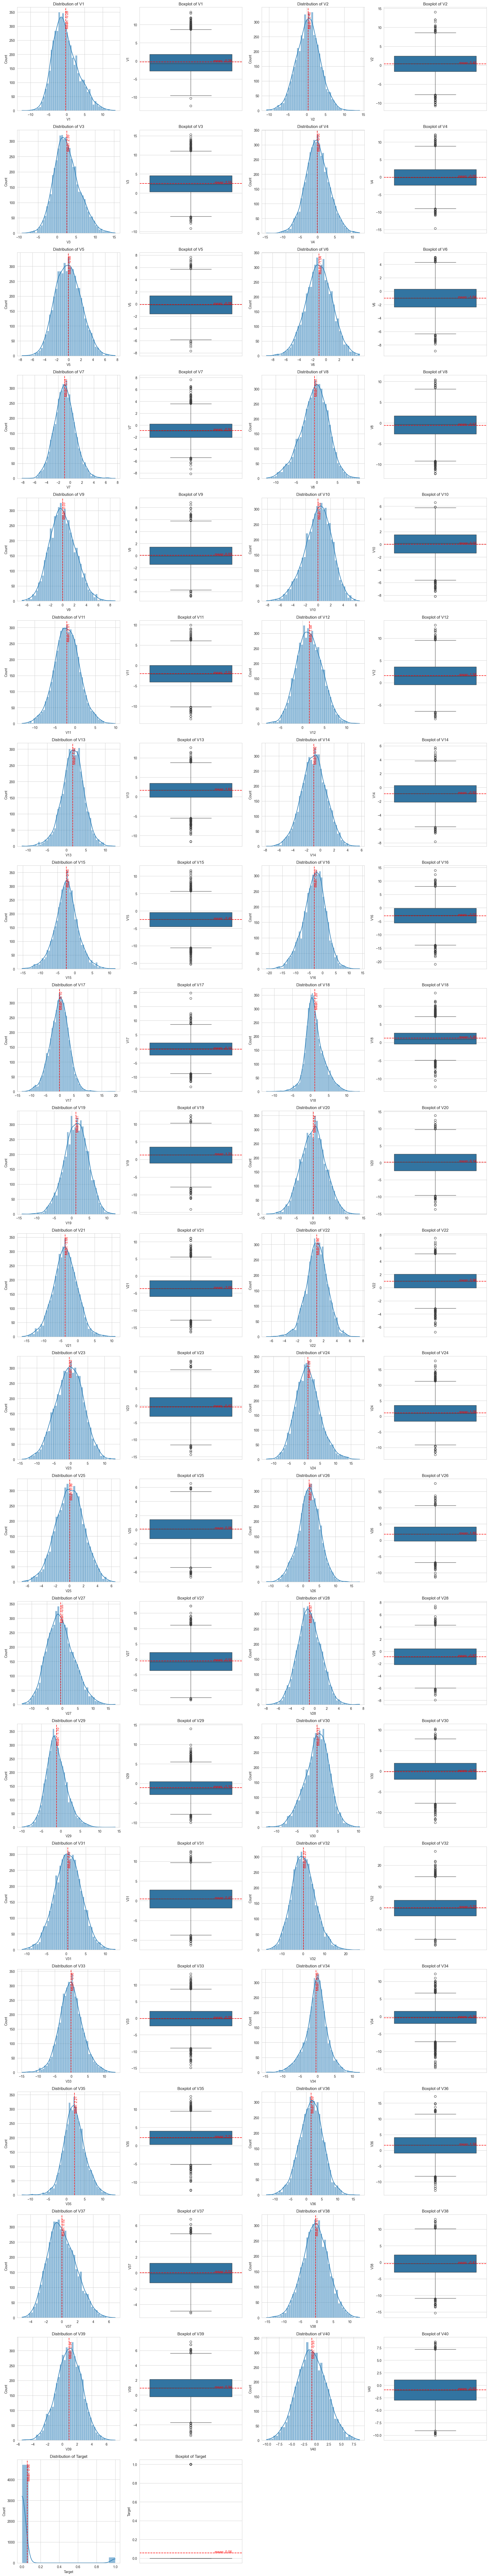

In [26]:
univariate_numerical(df_test)

**Notes**
* The data appears to be normalized during preprocessing, as all variables are normally distributed. In line with the problem statement, the data provided is claimed to be a transformed version of the original data.
* Data means for all predictors is around zero with minor right or left skewness in some predictors


In [27]:
# Calculate correlation matrix
corr_matrix = df_train.corr()

In [50]:
# Display the sorted correlation table
corr_unstacked = corr_matrix.unstack() # Unstack the correlation matrix
corr_unstacked = corr_unstacked.reset_index() # Reset the index to get 'variable1' and 'variable2' as columns
corr_unstacked.columns = ['variable1', 'variable2', 'correlation']# Rename the columns for better understanding
corr_unstacked = corr_unstacked[corr_unstacked['variable1'] != corr_unstacked['variable2']] # Remove self-correlations by filtering out rows where variable1 == variable2
corr_unstacked = corr_unstacked.drop_duplicates(subset=['correlation']) # Drop duplicates to keep only one entry per variable pair
sorted_corr = corr_unstacked.sort_values(by='correlation', ascending=False) # Sort the DataFrame by the absolute value of correlation

# Define a function to categorize the correlation level
def categorize_correlation(correlation):
    abs_corr = abs(correlation) * 100  # Convert to percentage for easier comparison
    if abs_corr < 30:
        return 'Negligible'
    elif 30 <= abs_corr < 50:
        return 'Low'
    elif 50 <= abs_corr < 70:
        return 'Moderate'
    elif 70 <= abs_corr < 90:
        return 'High'
    else:
        return 'Very High'

# Apply the function to create the corr_lvl column
sorted_corr['corr_lvl'] = sorted_corr['correlation'].apply(categorize_correlation)

In [51]:
sorted_corr['corr_lvl'].value_counts()

Negligible    483
Low           218
Moderate       97
High           22
Name: corr_lvl, dtype: int64

In [52]:
sorted_corr[(sorted_corr['corr_lvl'] == "High")&(sorted_corr['correlation'] >0)]

variable1 variable2  correlation corr_lvl
260         V7       V15        0.868     High
635        V16       V21        0.837     High
974        V24       V32        0.825     High
438        V11       V29        0.811     High
302         V8       V16        0.803     High
66          V2       V26        0.787     High
1010       V25       V27        0.766     High
771        V19       V34        0.756     High
1473       V36       V39        0.752     High
309         V8       V23        0.718     High
215         V6       V11        0.710     High

In [53]:
sorted_corr[(sorted_corr['corr_lvl'] == "High")&(sorted_corr['correlation'] >0)].shape[0]

11

In [54]:
sorted_corr[(sorted_corr['corr_lvl'] == "High")&(sorted_corr['correlation'] <=0)]

variable1 variable2  correlation corr_lvl
854        V21       V35       -0.700     High
682        V17       V27       -0.707     High
1015       V25       V32       -0.711     High
1016       V25       V33       -0.735     High
343         V9       V16       -0.753     High
969        V24       V27       -0.755     High
570        V14       V38       -0.763     High
1013       V25       V30       -0.765     High
1097       V27       V32       -0.766     High
104         V3       V23       -0.786     High
54          V2       V14       -0.854     High

In [46]:
sorted_corr[(sorted_corr['corr_lvl'] == "High")&(sorted_corr['correlation'] <=0)].shape[0]

11

**Notes**
* There are no predictor-pairs with a very high correlation (over 90%) 
* There are 22 predictor-pairs with high correlation (from 70% to 90%)
* 11 predictor-pairs with high Positive correlation
* 11 predictor-pairs with high Negative correlation

## Data Pre-processing

- Missing value treatment 
- Feature engineering (not needed)
- Outlier detection and treatment (not needed)
- Preparing data for modeling
- Any other preprocessing steps (not needed)

In [64]:
# specifying the independent  and dependent variables
X = df_train.drop(["Target"], axis=1)
y = df_train["Target"]

In [63]:
# specifying the independent  and dependent variables
X_test = df_test.drop(["Target"], axis=1)
y_test = df_test["Target"]

In [65]:
# splitting data in train and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

In [136]:
print(X_train.shape, X_val.shape, X_test.shape)

(15000, 40) (5000, 40) (5000, 40)


In [137]:
print(y_train.shape, y_val.shape, y_test.shape)

(15000,) (5000,) (5000,)


### Missing value imputation




In [67]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="mean")
cols_to_impute = ["V1", "V2"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

In [74]:
# Checking that no column has missing values in train or test sets
print("X_train NaN:",X_train.isna().sum().sum())
print("X_val NaN:",X_val.isna().sum().sum())
print("X_test NaN:",X_test.isna().sum().sum())

X_train NaN: 0
X_val NaN: 0
X_test NaN: 0


**Notes**
* Training data split on train and validation 
* Final data split for Training-Validation-Test is 60-20-20
 * Imputed missing values with mean. 
* Data imputation done separately on each data subset to prevent data leak.

## Consolidated notes on EDA
* The data appears to be normalized during preprocessing, as all variables are normally distributed. In line with the problem statement: "the data provided is claimed to be a transformed version of the original data".
* Data means for all predictors is around zero with minor right or left skewness in some predictors.
* There are no predictor-pairs with a very high correlation (over 90%) 
* There are 22 predictor-pairs with high correlation (from 70% to 90%)
* 11 predictor-pairs with high Positive correlation
* 11 predictor-pairs with high Negative correlation
* Training data split on train and validation 
* Final data split for Training-Validation-Test is 60-20-20
 * Imputed missing values with mean. 
* Data imputation done separately on each data subset to prevent data leak.

# Model Building

## Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Notes**
* False negatives (FN) are real failures in a generator where there is no detection by model. We would want **Recall to be maximized** as greater the Recall, the higher the chances of **minimizing false negatives**.


## Model evaluation functions

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [434]:
# Define a function to compute different metrics to check the performance of a classification model built using statsmodels
def classification_performance(model, train_data, predictors, target, df_perf=None, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance
        model: classifier
        predictors: independent variables
        target: dependent variable
        description: description of the model        
        df_perf: existing dataframe to append the results to
        threshold: threshold for classifying the observation as class 1
    """
    # If df_perf is not provided, create an empty dataframe
    if df_perf is None:
        df_perf = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "F1"])
    
    # Checking which probabilities are greater than the threshold
    pred_temp = model.predict(predictors) > threshold
    # Rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # Compute Accuracy
    recall = recall_score(target, pred)  # Compute Recall
    precision = precision_score(target, pred)  # Compute Precision
    f1 = f1_score(target, pred)  # Compute F1-score
   
    # Append the new row with the provided metrics
    df_perf = df_perf.append(
        {"Model": "{}_{}".format(model.__class__.__name__, train_data), "Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        ignore_index=True
    )
    return df_perf


In [257]:
def plot_cm_train_test(model, X_train, y_train, X_test, y_test, train_model_desc="Model_Train", test_model_desc="Model 1_Test", threshold=0.5):
    
    '''
    Function to plot two confusion matrix, 
    Allows to compare confusion matrix side by side 
    present train and test confusion matrix from a single model   
    '''
    
    # Predictions for model 1 Train
    pred1 = model.predict(X_train) > threshold
    pred1 = np.round(pred1)
    cm1 = confusion_matrix(y_train, pred1)

    # Predictions for model 1 Test
    pred2 = model.predict(X_test) > threshold
    pred2 = np.round(pred2)
    cm2 = confusion_matrix(y_test, pred2)

    # Calculate the percentages for model 1
    cm1_percentage = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis] * 100
    # Create labels with both counts and percentages for model 1
    labels1 = [f'{count}\n{percent:.2f}%' for count, percent in zip(cm1.flatten(), cm1_percentage.flatten())]
    labels1 = np.asarray(labels1).reshape(cm1.shape)

    # Calculate the percentages for model 2
    cm2_percentage = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis] * 100
    # Create labels with both counts and percentages for model 2
    labels2 = [f'{count}\n{percent:.2f}%' for count, percent in zip(cm2.flatten(), cm2_percentage.flatten())]
    labels2 = np.asarray(labels2).reshape(cm2.shape)

    # Plot side by side
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Confusion matrix for model 1 Train
    sns.heatmap(cm1, annot=labels1, fmt="", cmap="Blues", ax=axes[0])
    axes[0].set_title(train_model_desc)
    axes[0].set_xlabel("Predicted Values")
    axes[0].set_ylabel("Actual Values")

    # Confusion matrix for model 1 Test
    sns.heatmap(cm2, annot=labels2, fmt="", cmap="Blues", ax=axes[1])
    axes[1].set_title(test_model_desc)
    axes[1].set_xlabel("Predicted Values")
    axes[1].set_ylabel("Actual Values")

    plt.tight_layout()
    plt.show()


In [601]:
def plot_cm_model1_model2(model1, model2, X_train1, X_train2, y_train, model1_desc="Model 1", model2_desc="Model 2", threshold=0.5):

    '''
    Function to plot two confusion matrix, 
    Allows to compare confusion matrix side by side 
    present confusion matrix from two models
    to compare train or test data
    '''    
        
    # Predictions for model 1
    pred1 = model1.predict(X_train1) > threshold
    pred1 = np.round(pred1)
    cm1 = confusion_matrix(y_train, pred1)

    # Predictions for model 2
    pred2 = model2.predict(X_train2) > threshold
    pred2 = np.round(pred2)
    cm2 = confusion_matrix(y_train, pred2)

    # Calculate the percentages for model 1
    cm1_percentage = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis] * 100
    # Create labels with both counts and percentages for model 1
    labels1 = [f'{count}\n{percent:.2f}%' for count, percent in zip(cm1.flatten(), cm1_percentage.flatten())]
    labels1 = np.asarray(labels1).reshape(cm1.shape)

    # Calculate the percentages for model 2
    cm2_percentage = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis] * 100
    # Create labels with both counts and percentages for model 2
    labels2 = [f'{count}\n{percent:.2f}%' for count, percent in zip(cm2.flatten(), cm2_percentage.flatten())]
    labels2 = np.asarray(labels2).reshape(cm2.shape)

    # Plot side by side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Confusion matrix for model 1
    sns.heatmap(cm1, annot=labels1, fmt="", cmap="Blues", ax=axes[0])
    axes[0].set_title(model1_desc)
    axes[0].set_xlabel("Predicted Values")
    axes[0].set_ylabel("Actual Values")

    # Confusion matrix for model 2
    sns.heatmap(cm2, annot=labels2, fmt="", cmap="Blues", ax=axes[1])
    axes[1].set_title(model2_desc)
    axes[1].set_xlabel("Predicted Values")
    axes[1].set_ylabel("Actual Values")

    plt.tight_layout()
    plt.show()


## Sample Functions

#### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [160]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#### Sample Decision Tree model building with original data

In [81]:
models_od = []  # Empty list to store all the models with Original Data ("od")

# Appending models into the list
models_od.append(("LogisticRegression",LogisticRegression(random_state=1)))
models_od.append(("dtree", DecisionTreeClassifier(random_state=1)))
models_od.append(("Random forest", RandomForestClassifier(random_state=1)))
models_od.append(("Bagging", BaggingClassifier(random_state=1)))
models_od.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_od.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_od.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results_od = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models_od:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results_od.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models_od:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

LogisticRegression: 0.5144578313253012
dtree: 0.7139600317437415
Random forest: 0.7259577231080009
Bagging: 0.7163696702979583
GBM: 0.7007070196955487
Adaboost: 0.5938027559339153
Xgboost: 0.8113051006420893

Validation Performance:

LogisticRegression: 0.420863309352518
dtree: 0.697841726618705
Random forest: 0.6906474820143885
Bagging: 0.6870503597122302
GBM: 0.6654676258992805
Adaboost: 0.5251798561151079
Xgboost: 0.7769784172661871


In [179]:
results_od

[array([0.51807229, 0.55421687, 0.5       , 0.50898204, 0.49101796]),
 array([0.72289157, 0.70481928, 0.72891566, 0.65269461, 0.76047904]),
 array([0.71686747, 0.74698795, 0.71084337, 0.66467066, 0.79041916]),
 array([0.70481928, 0.74096386, 0.72289157, 0.67664671, 0.73652695]),
 array([0.69879518, 0.71084337, 0.68072289, 0.66467066, 0.74850299]),
 array([0.62048193, 0.63855422, 0.56626506, 0.5508982 , 0.59281437]),
 array([0.8313253 , 0.8253012 , 0.78313253, 0.75449102, 0.86227545])]

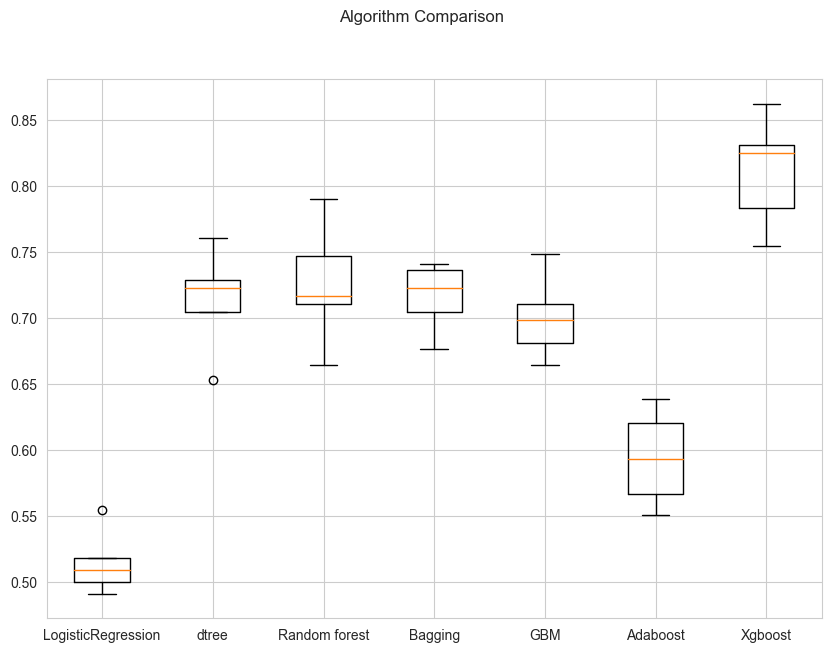

In [83]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_od)
ax.set_xticklabels(names)

plt.show()

## Support functions

In [289]:

# Specify the model
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("LogisticRegression",LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
#models.append(("Random forest", RandomForestClassifier(random_state=1)))
#models.append(("Bagging", BaggingClassifier(random_state=1)))
#models.append(("GBM", GradientBoostingClassifier(random_state=1)))
#models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
#models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

In [297]:

def models_classification_performance_cv_cv(models, train_data, train_predictors, train_target, test_data, test_predictors, test_target, df_perf=None):
    """
    Function to compute different metrics to check classification model performance
    models: list of models to evaluate
    train_predictors: X_train - training set predictors
    train_target: y_train - training set target
    test_predictors: X_val - validation set predictors
    test_target: y_val - validation set target
    df_perf: dataframe to store performance metrics
        
    In this version, after fitting the model on the training set, cross-validation is again performed on the validation set
    This means the validation performance is averaged over multiple splits within the validation set itself.    
    """

    # Define the scoring metrics
    scoring = ['accuracy', 'precision', 'recall', 'f1']

    # If df_perf is not provided, create an empty dataframe
    if df_perf is None:
        df_perf = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "F1"])

    # Empty list to store all model's CV scores
    train_results = []  
    test_results = []  
    
    # Perform cross-validation on the training set
    for name, model in models:
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5
        cv_result = cross_validate( estimator=model, X=train_predictors, y=train_target, scoring=scoring, cv=kfold)
        train_results.append(cv_result)
        df_perf = df_perf.append(
            {"Model": "{}_{}".format(name,train_data), 
             "Accuracy": cv_result['test_accuracy'].mean(), 
             "Recall": cv_result['test_recall'].mean(), 
             "Precision": cv_result['test_precision'].mean(), 
             "F1": cv_result['test_f1'].mean()},
            ignore_index=True
        )
    
    # Perform cross-validation on the test set
    for name, model in models:
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5
        cv_result = cross_validate( estimator=model, X=test_predictors, y=test_target, scoring=scoring, cv=kfold)
        test_results.append(cv_result)
        df_perf = df_perf.append(
            {"Model": "{}_{}".format(name,test_data), 
             "Accuracy": cv_result['test_accuracy'].mean(), 
             "Recall": cv_result['test_recall'].mean(), 
             "Precision": cv_result['test_precision'].mean(), 
             "F1": cv_result['test_f1'].mean()},
            ignore_index=True)
    
    return df_perf, train_results, test_results


In [319]:
def models_classification_performance_cv_fit(models, train_data, train_predictors, train_target, test_data, test_predictors, test_target, df_perf=None):
    """
    Function to compute different metrics to check classification model performance
    models: list of models to evaluate
    train_predictors: X_train - training set predictors
    train_target: y_train - training set target
    test_predictors: X_val - validation set predictors
    test_target: y_val - validation set target
    df_perf: dataframe to store performance metrics
    
    After fitting the model on the training data, the model is directly evaluated on the validation set
    This means the performance is measured based on a single pass on the validation data after training.
    """

    # Define the scoring metrics for training data cross-validation
    scoring = ['accuracy', 'precision', 'recall', 'f1']

    # If df_perf is not provided, create an empty dataframe
    if df_perf is None:
        df_perf = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "F1"])

    # Empty list to store all model's CV scores
    train_results = []  
    
    
    # Perform cross-validation on the training set
    for name, model in models:
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5
        cv_result = cross_validate(estimator=model, X=train_predictors, y=train_target, scoring=scoring, cv=kfold)
        train_results.append(cv_result)
        df_perf = df_perf.append(
            {"Model": "{}_{}".format(name, train_data), 
             "Accuracy": cv_result['test_accuracy'].mean(), 
             "Recall": cv_result['test_recall'].mean(), 
             "Precision": cv_result['test_precision'].mean(), 
             "F1": cv_result['test_f1'].mean()},
            ignore_index=True
        )
    
    # Evaluate the model directly on the validation set (no cross-validation here)
    for name, model in models:
        model.fit(train_predictors, train_target)
        y_pred = model.predict(test_predictors)
        
        # Compute metrics directly on the validation set
        accuracy = accuracy_score(test_target, y_pred)
        recall = recall_score(test_target, y_pred)
        precision = precision_score(test_target, y_pred)
        f1 = f1_score(test_target, y_pred)

        # Append the new row with the provided metrics
        df_perf = df_perf.append(
            {"Model": "{}_{}".format(name, test_data), 
             "Accuracy": accuracy, 
             "Recall": recall, 
             "Precision": precision, 
             "F1": f1},
            ignore_index=True
        )
        
    return df_perf, train_results


In [298]:
# inicialize clasification performance dataframe
df_perf_v1 = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "F1"])
df_perf_v1

Empty DataFrame
Columns: [Model, Accuracy, Recall, Precision, F1]
Index: []

In [299]:

df_perf_v1,train_results,test_results=models_classification_performance_cv_cv(models, "orig_cv_train", X_train, y_train, "orig_cv_val", X_val, y_val)
df_perf_v1

Model  Accuracy  Recall  Precision    F1
0  LogisticRegression_orig_cv_train     0.968   0.514      0.851 0.641
1               dtree_orig_cv_train     0.968   0.714      0.710 0.711
2    LogisticRegression_orig_cv_val     0.963   0.425      0.826 0.560
3                 dtree_orig_cv_val     0.960   0.637      0.653 0.642

**Notes**
* The sample code considers metric evaluation focused on a single metric with the cross_val_score function on the metric of interest (Recall in this case).
* The proposed code aims to evaluate multiple metrics (such as precision, recall, accuracy and F1 scores) using cross_validate function instead of cross_val_score.


In [291]:
# inicialize clasification performance dataframe
df_perf_v2 = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "F1"])
df_perf_v2

Empty DataFrame
Columns: [Model, Accuracy, Recall, Precision, F1]
Index: []

In [292]:

df_perf_v2,train_results=models_classification_performance_cv_fit(models, "orig_cv_train", X_train, y_train, "orig_val", X_val, y_val)
df_perf_v2

Model  Accuracy  Recall  Precision    F1
0  LogisticRegression_orig_cv_train     0.968   0.514      0.851 0.641
1               dtree_orig_cv_train     0.968   0.714      0.710 0.711
2       LogisticRegression_orig_val     0.963   0.421      0.824 0.557
3                    dtree_orig_val     0.966   0.698      0.695 0.697

**Notes**
* The proposed code follows the sample code evaluation method: After fitting the model to the training data, the model is evaluated directly on the validation set, this means that the performance is measured based on a single pass on the validation data after training.
* Proposed code as a function with outputs df_perf (dataframe with model performance metrics), train_results (raw cross validation results from train folds).


In [300]:
train_results

[{'fit_time': array([0.15290928, 0.17990232, 0.10894036, 0.09095645, 0.09896183]),
  'score_time': array([0.01998973, 0.01898241, 0.01099205, 0.00998449, 0.0089972 ]),
  'test_accuracy': array([0.968     , 0.96833333, 0.967     , 0.96766667, 0.969     ]),
  'test_precision': array([0.84313725, 0.81415929, 0.83838384, 0.85      , 0.91111111]),
  'test_recall': array([0.51807229, 0.55421687, 0.5       , 0.50898204, 0.49101796]),
  'test_f1': array([0.64179104, 0.65949821, 0.62641509, 0.63670412, 0.6381323 ])},
 {'fit_time': array([1.51313019, 1.36323881, 1.61307859, 1.76299119, 1.88693547]),
  'score_time': array([0.01297164, 0.00999451, 0.01596904, 0.01398826, 0.01397276]),
  'test_accuracy': array([0.96733333, 0.96633333, 0.97066667, 0.968     , 0.967     ]),
  'test_precision': array([0.69767442, 0.69230769, 0.73780488, 0.7414966 , 0.6827957 ]),
  'test_recall': array([0.72289157, 0.70481928, 0.72891566, 0.65269461, 0.76047904]),
  'test_f1': array([0.71005917, 0.69850746, 0.73333333,

In [301]:
test_results

[{'fit_time': array([0.05299735, 0.06100988, 0.04792595, 0.04597759, 0.04397535]),
  'score_time': array([0.01197505, 0.01099372, 0.01099157, 0.01099086, 0.01299214]),
  'test_accuracy': array([0.964, 0.966, 0.967, 0.959, 0.959]),
  'test_precision': array([0.88      , 0.81818182, 0.89655172, 0.77777778, 0.75862069]),
  'test_recall': array([0.4       , 0.49090909, 0.46428571, 0.375     , 0.39285714]),
  'test_f1': array([0.55      , 0.61363636, 0.61176471, 0.5060241 , 0.51764706])},
 {'fit_time': array([0.36579251, 0.39177299, 0.43175268, 0.46073484, 0.39976788]),
  'score_time': array([0.01299024, 0.00899577, 0.01799011, 0.00899386, 0.01099467]),
  'test_accuracy': array([0.964, 0.952, 0.97 , 0.952, 0.964]),
  'test_precision': array([0.71111111, 0.55384615, 0.73214286, 0.56896552, 0.7       ]),
  'test_recall': array([0.58181818, 0.65454545, 0.73214286, 0.58928571, 0.625     ]),
  'test_f1': array([0.64      , 0.6       , 0.73214286, 0.57894737, 0.66037736])}]

In [302]:
models

[('LogisticRegression', LogisticRegression(random_state=1)),
 ('dtree', DecisionTreeClassifier(random_state=1))]

In [303]:
# Extracting the model names
model_names = [name for name, _ in models]

In [304]:
model_names

['LogisticRegression', 'dtree']

In [305]:
zipped_result = list(zip(model_names, train_results))
print(zipped_result)

[('LogisticRegression', {'fit_time': array([0.15290928, 0.17990232, 0.10894036, 0.09095645, 0.09896183]), 'score_time': array([0.01998973, 0.01898241, 0.01099205, 0.00998449, 0.0089972 ]), 'test_accuracy': array([0.968     , 0.96833333, 0.967     , 0.96766667, 0.969     ]), 'test_precision': array([0.84313725, 0.81415929, 0.83838384, 0.85      , 0.91111111]), 'test_recall': array([0.51807229, 0.55421687, 0.5       , 0.50898204, 0.49101796]), 'test_f1': array([0.64179104, 0.65949821, 0.62641509, 0.63670412, 0.6381323 ])}), ('dtree', {'fit_time': array([1.51313019, 1.36323881, 1.61307859, 1.76299119, 1.88693547]), 'score_time': array([0.01297164, 0.00999451, 0.01596904, 0.01398826, 0.01397276]), 'test_accuracy': array([0.96733333, 0.96633333, 0.97066667, 0.968     , 0.967     ]), 'test_precision': array([0.69767442, 0.69230769, 0.73780488, 0.7414966 , 0.6827957 ]), 'test_recall': array([0.72289157, 0.70481928, 0.72891566, 0.65269461, 0.76047904]), 'test_f1': array([0.71005917, 0.69850746

In [306]:
result.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

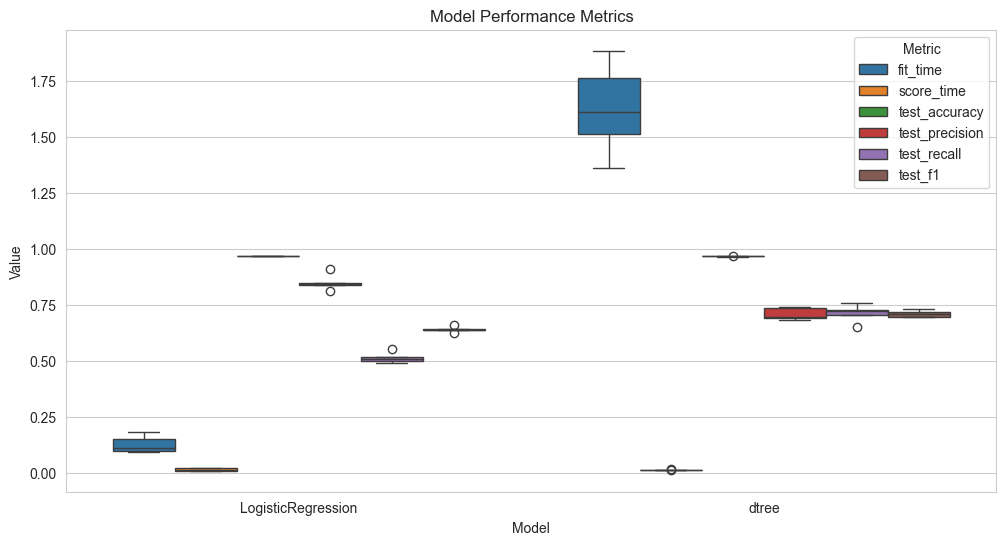

In [307]:
# Flattening the data into a DataFrame for plotting
data = []
for model_name, result in zip(model_names, train_results): # in: [('LogisticRegression', {'fit_time': array([0.15791011, ....
    for metric in result.keys(): # in: dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
        for value in result[metric]:
            data.append([model_name, metric, value])

df = pd.DataFrame(data, columns=["Model", "Metric", "Value"])

# Plotting the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Model", y="Value", hue="Metric", data=df)
plt.title("Model Performance Metrics")
plt.show()

In [313]:
def plot_model_performance(model_name, cv_results, metrics='all'):
    # Ensure model_name is a list
    if not isinstance(model_name, list):
        model_name = [model_name]

    # Ensure metrics is a list
    if metrics != 'all' and not isinstance(metrics, list):
        metrics = [metrics]

    data = []
    for name, result in zip(model_name, cv_results):
        for metric in result.keys():
            if metrics == 'all' or metric in metrics:
                for value in result[metric]:
                    data.append([name, metric, value])

    df = pd.DataFrame(data, columns=["Model", "Metric", "Value"])

    # Plotting the boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Model", y="Value", hue="Metric", data=df)
    plt.title("Model Performance Metrics")
    plt.show()

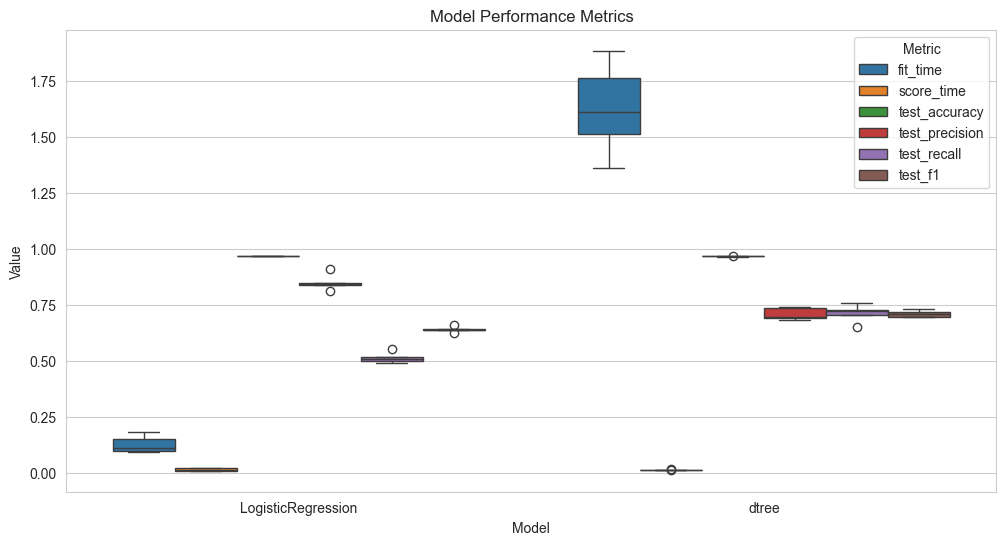

In [314]:
plot_model_performance(model_names, train_results, metrics='all')

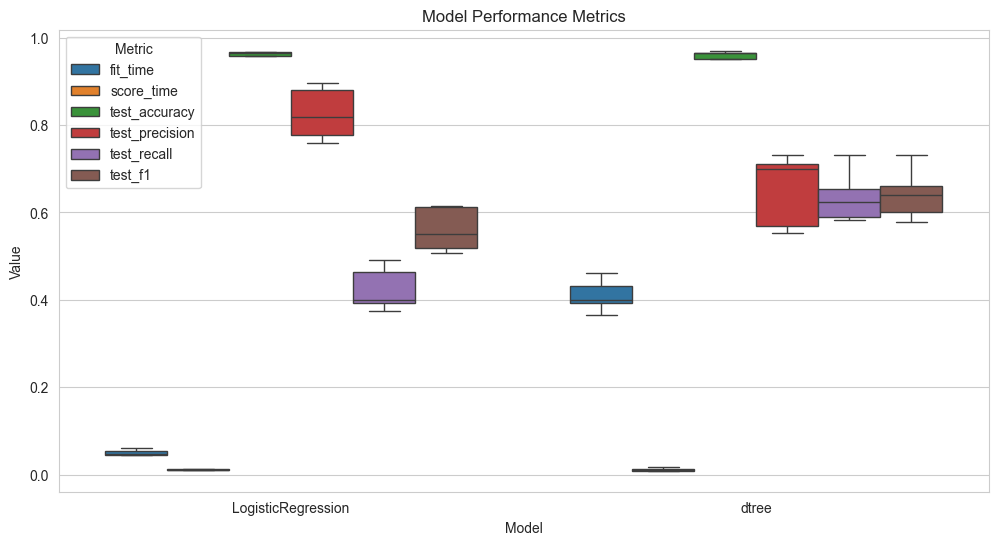

In [315]:
plot_model_performance(model_names, test_results, metrics='all')

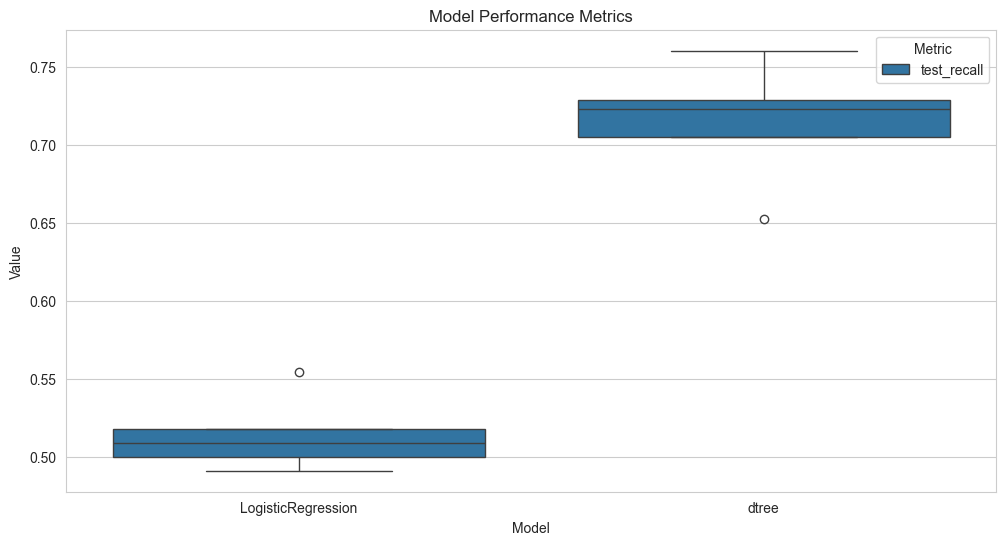

In [316]:
plot_model_performance(model_names, train_results, metrics='test_recall')

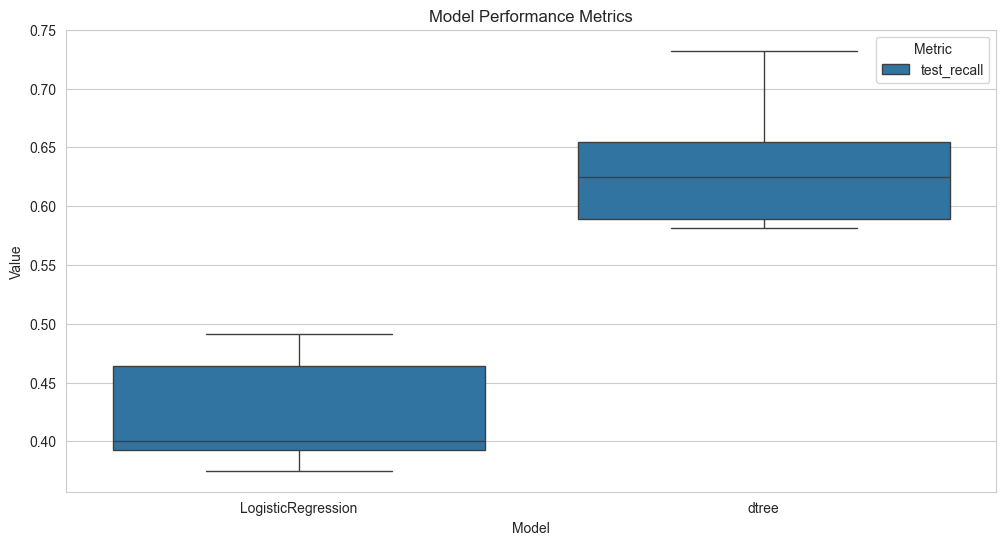

In [317]:
plot_model_performance(model_names, test_results, metrics='test_recall')

**Notes**
* For visualization, a function is proposed to have flexibility in terms of which models and metrics to visualize from the raw cross validation results from train folds.


## Model Building with original data

In [335]:
# Specify the model
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("LogisticRegression",LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

In [369]:
%%time
df_perf_orig, orig_results=models_classification_performance_cv_fit(models, "orig_cv_train", X_train, y_train, "orig_fit_val", X_val, y_val)

CPU times: total: 7min 35s
Wall time: 7min 20s


In [370]:
df_perf_orig[(df_perf_orig['Model'].str.contains("val"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
13             Xgboost_orig_fit_val     0.987   0.777      0.977 0.866
8                dtree_orig_fit_val     0.966   0.698      0.695 0.697
9        Random forest_orig_fit_val     0.983   0.691      1.000 0.817
10             Bagging_orig_fit_val     0.980   0.687      0.941 0.794
11                 GBM_orig_fit_val     0.979   0.665      0.934 0.777
12            Adaboost_orig_fit_val     0.969   0.525      0.864 0.653
7   LogisticRegression_orig_fit_val     0.963   0.421      0.824 0.557

In [371]:
df_perf_orig[(df_perf_orig['Model'].str.contains("train"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
6             Xgboost_orig_cv_train     0.989   0.811      0.979 0.887
2       Random forest_orig_cv_train     0.984   0.726      0.984 0.835
3             Bagging_orig_cv_train     0.982   0.716      0.948 0.815
1               dtree_orig_cv_train     0.968   0.714      0.710 0.711
4                 GBM_orig_cv_train     0.980   0.701      0.925 0.797
5            Adaboost_orig_cv_train     0.972   0.594      0.860 0.702
0  LogisticRegression_orig_cv_train     0.968   0.514      0.851 0.641

In [340]:
models_names = [name for name, _ in models]
models_names

['LogisticRegression',
 'dtree',
 'Random forest',
 'Bagging',
 'GBM',
 'Adaboost',
 'Xgboost']

In [356]:
keys = list(orig_results[0].keys())
keys

['fit_time',
 'score_time',
 'test_accuracy',
 'test_precision',
 'test_recall',
 'test_f1']

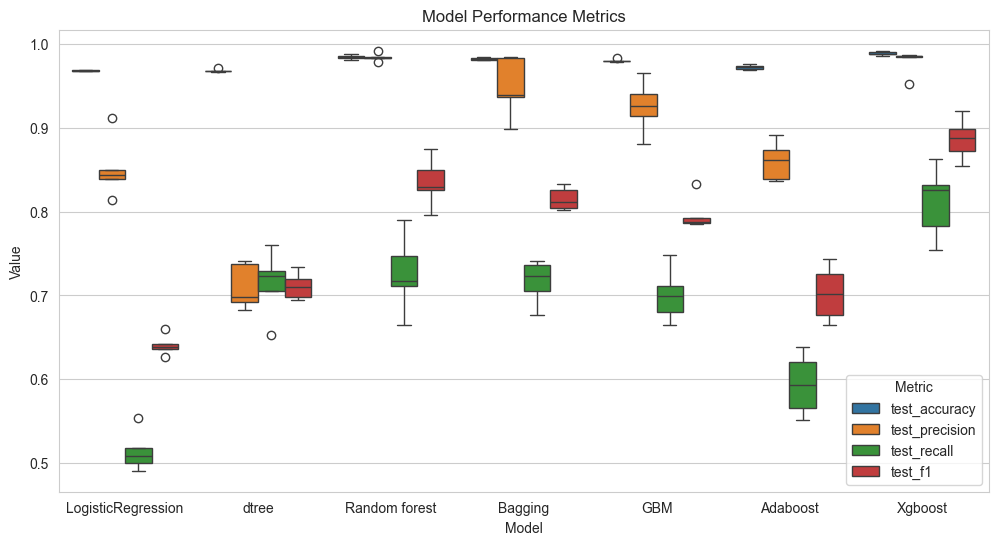

In [357]:
plot_model_performance(models_names, orig_results, metrics=keys[2:])

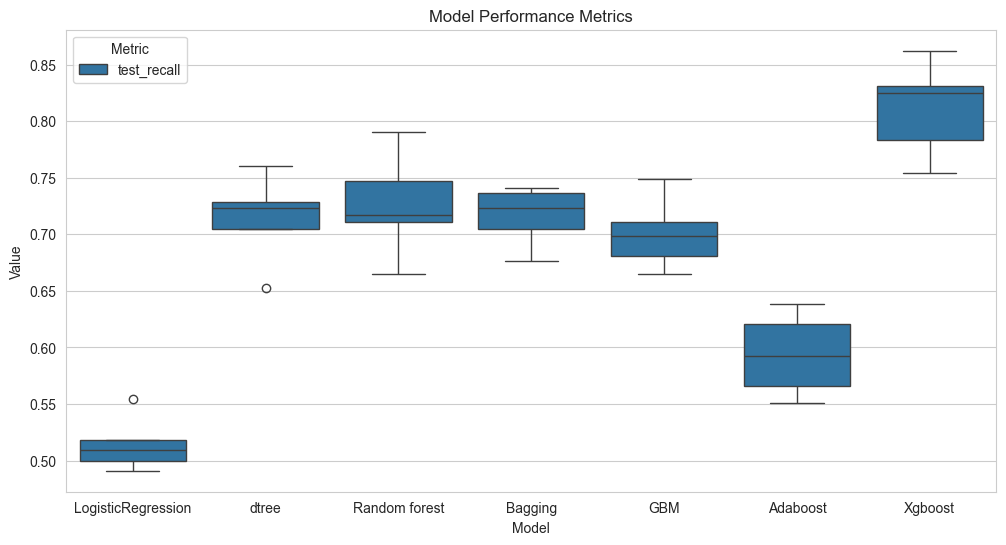

In [343]:
plot_model_performance(models_names, orig_results, metrics='test_recall')

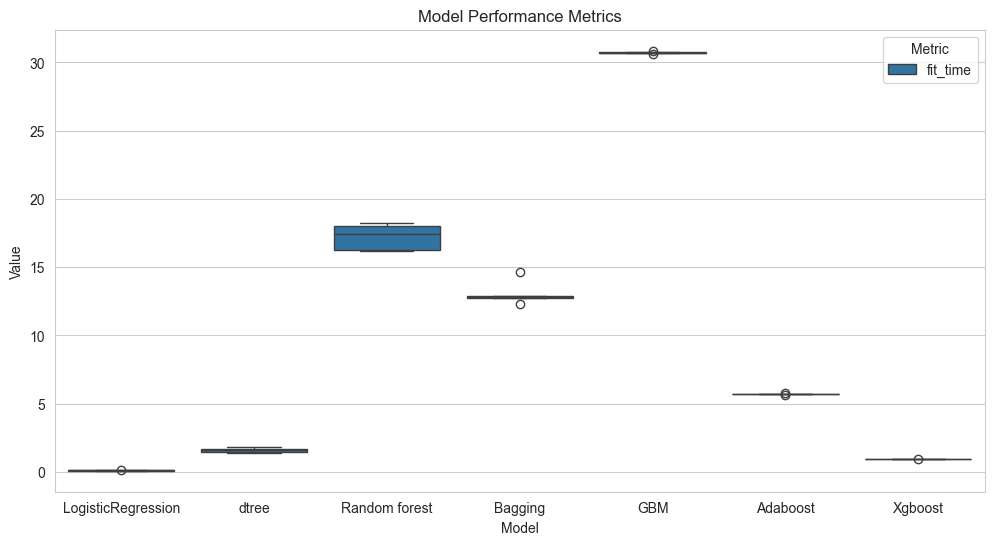

In [345]:
plot_model_performance(models_names, orig_results, metrics='fit_time')

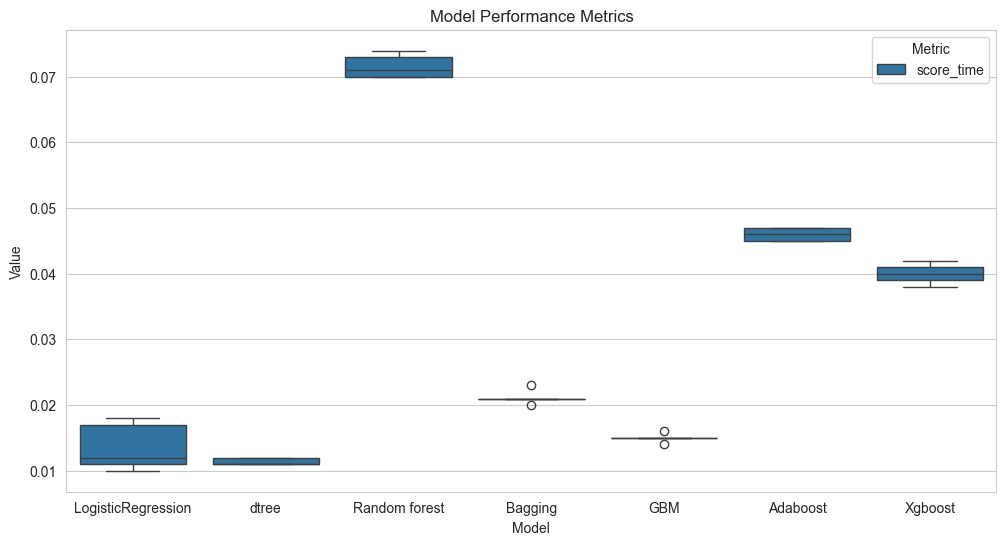

In [346]:
plot_model_performance(models_names, orig_results, metrics='score_time')

In [384]:
Xgboost_orig= XGBClassifier(random_state=1, eval_metric="logloss").fit(X_train, y_train)

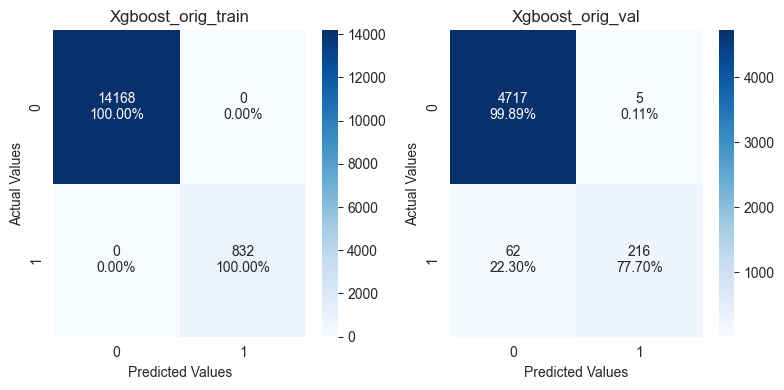

In [390]:

plot_cm_train_test(Xgboost_orig, X_train, y_train, X_val, y_val, train_model_desc="Xgboost_orig_train", test_model_desc="Xgboost_orig_val")

**Notes**
* From all models over the **original dataset**, the **XGBoost model have the best performance** (highest recall) and generalizes well on the **validation dataset**.
* The fit_time, amount of time taken by the model to fit (train) on each fold during cross-validation is, for the best performer model, the second smallest across all models.
* The score_time, amount of time taken by the model to make predictions and evaluate the performance (scoring) on each fold during cross-validation is,  for the best performer model, the third greater across all models.
* Model Building (7 models) with Original data took 7 minutes.

## Model Building with Oversampled data

In [358]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [361]:
%%time
df_perf_over, over_results=models_classification_performance_cv_fit(models, "over_cv_train", X_train_over, y_train_over, "over_fit_val", X_val, y_val)

CPU times: total: 13min 17s
Wall time: 13min 15s


In [372]:
df_perf_over[(df_perf_over['Model'].str.contains("val"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
11                 GBM_over_fit_val     0.966   0.878      0.646 0.744
13             Xgboost_over_fit_val     0.987   0.860      0.909 0.884
7   LogisticRegression_over_fit_val     0.882   0.838      0.299 0.441
9        Random forest_over_fit_val     0.989   0.824      0.966 0.889
12            Adaboost_over_fit_val     0.901   0.824      0.338 0.480
10             Bagging_over_fit_val     0.980   0.802      0.835 0.818
8                dtree_over_fit_val     0.950   0.777      0.537 0.635

In [373]:
df_perf_over[(df_perf_over['Model'].str.contains("train"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
6             Xgboost_over_cv_train     0.992   0.991      0.994 0.992
2       Random forest_over_cv_train     0.990   0.984      0.996 0.990
3             Bagging_over_cv_train     0.983   0.978      0.987 0.982
1               dtree_over_cv_train     0.962   0.969      0.956 0.963
4                 GBM_over_cv_train     0.948   0.925      0.970 0.947
5            Adaboost_over_cv_train     0.909   0.901      0.916 0.908
0  LogisticRegression_over_cv_train     0.880   0.879      0.881 0.880

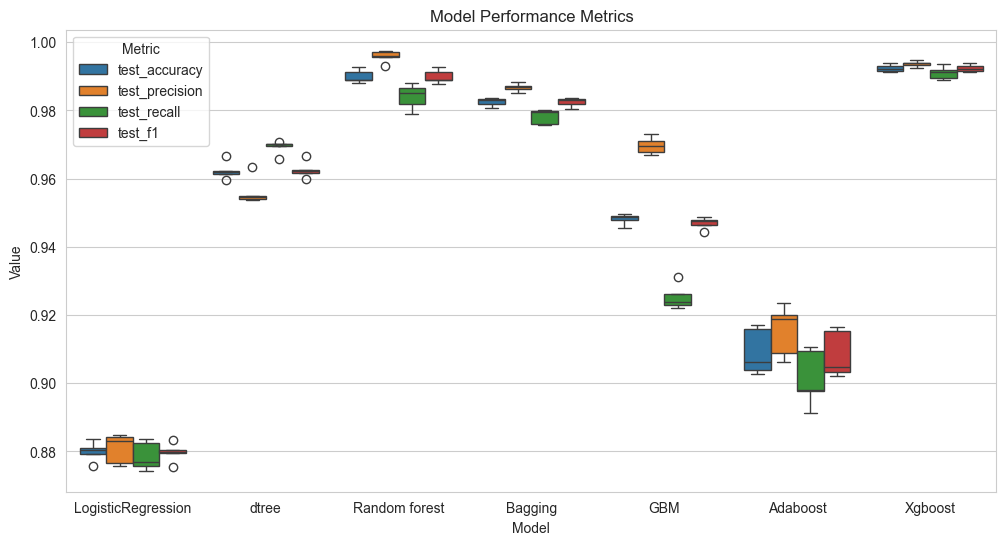

In [363]:
plot_model_performance(models_names, over_results, metrics=keys[2:])

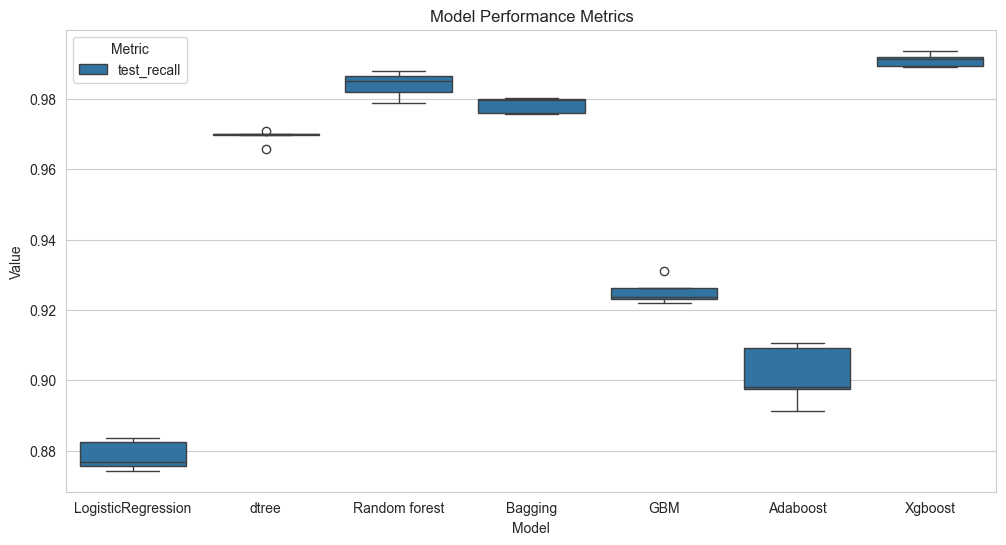

In [374]:
plot_model_performance(models_names, over_results, metrics='test_recall')

In [386]:
GBM_over= GradientBoostingClassifier(random_state=1).fit(X_train_over, y_train_over)

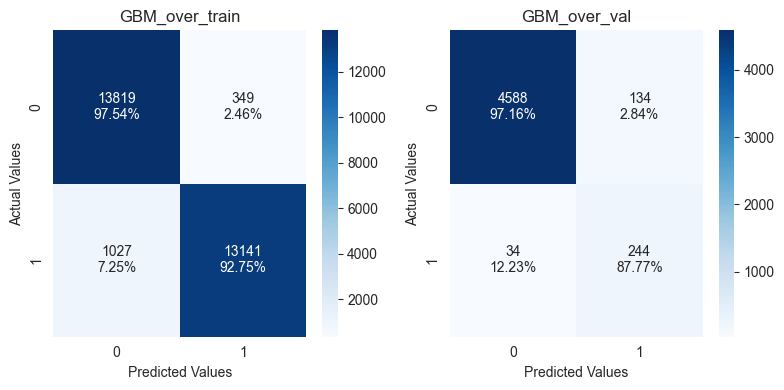

In [389]:

plot_cm_train_test(GBM_over, X_train_over, y_train_over, X_val, y_val, train_model_desc="GBM_over_train", test_model_desc="GBM_over_val")

**Notes**
* From all models over the **oversampled dataset**, the **GradientBoost model have the best performance** (highest recall) and generalizes well on the **validation dataset**.
* XGBoost tends to overfit on training data and do not generalize as well as GradientBoost
* Model Building (7 models) with Oversampled data took 13 minutes, makes sense it takes more time considering is a bigger dataset as oversampling goes from 5.6% of rows.


## Model Building with Undersampled data

In [378]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [379]:
%%time
df_perf_under, under_results=models_classification_performance_cv_fit(models, "under_cv_train", X_train_un, y_train_un, "under_fit_val", X_val, y_val)

CPU times: total: 48.9 s
Wall time: 39.6 s


In [380]:
df_perf_under[(df_perf_under['Model'].str.contains("val"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
13             Xgboost_under_fit_val     0.953   0.885      0.549 0.678
9        Random forest_under_fit_val     0.944   0.881      0.500 0.638
11                 GBM_under_fit_val     0.937   0.881      0.463 0.607
12            Adaboost_under_fit_val     0.876   0.867      0.292 0.437
10             Bagging_under_fit_val     0.924   0.863      0.412 0.557
7   LogisticRegression_under_fit_val     0.875   0.845      0.288 0.430
8                dtree_under_fit_val     0.841   0.827      0.235 0.366

In [381]:
df_perf_under[(df_perf_under['Model'].str.contains("train"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
2       Random forest_under_cv_train     0.924   0.897      0.948 0.921
4                 GBM_under_cv_train     0.912   0.895      0.926 0.910
6             Xgboost_under_cv_train     0.927   0.895      0.956 0.925
5            Adaboost_under_cv_train     0.874   0.869      0.879 0.874
3             Bagging_under_cv_train     0.892   0.864      0.917 0.889
0  LogisticRegression_under_cv_train     0.861   0.859      0.862 0.860
1               dtree_under_cv_train     0.849   0.856      0.846 0.850

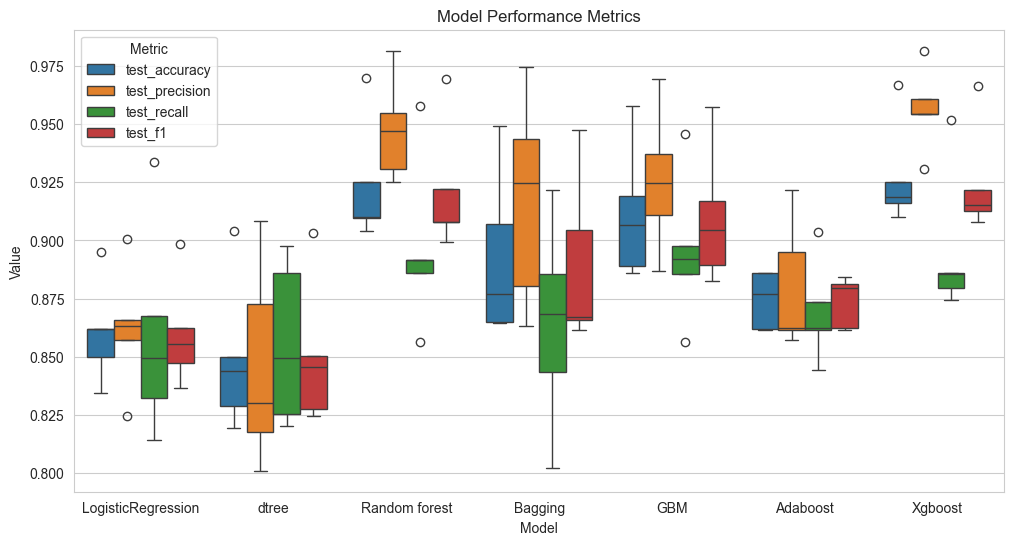

In [382]:
plot_model_performance(models_names, under_results, metrics=keys[2:])

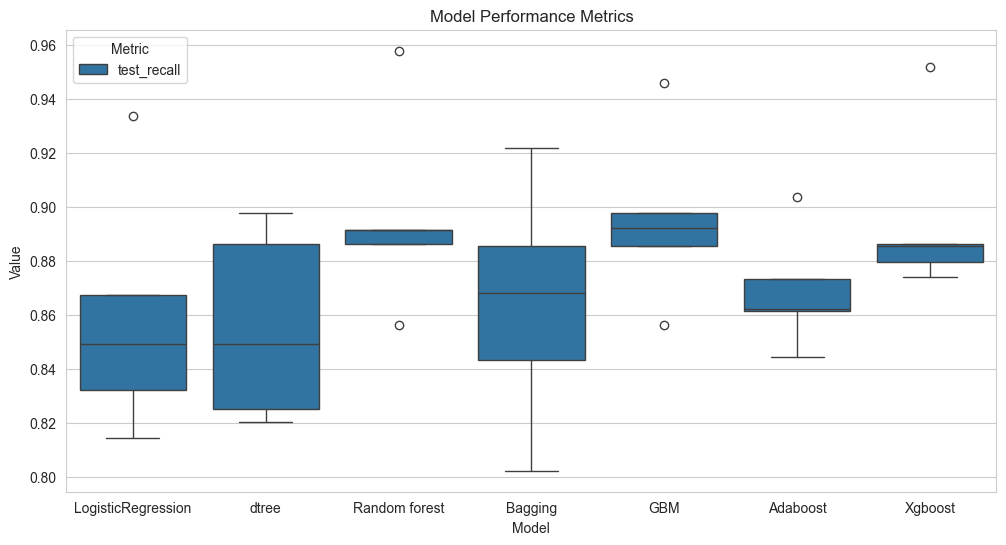

In [383]:
plot_model_performance(models_names, under_results, metrics='test_recall')

In [391]:
Xgboost_under= XGBClassifier(random_state=1, eval_metric="logloss").fit(X_train_un, y_train_un)

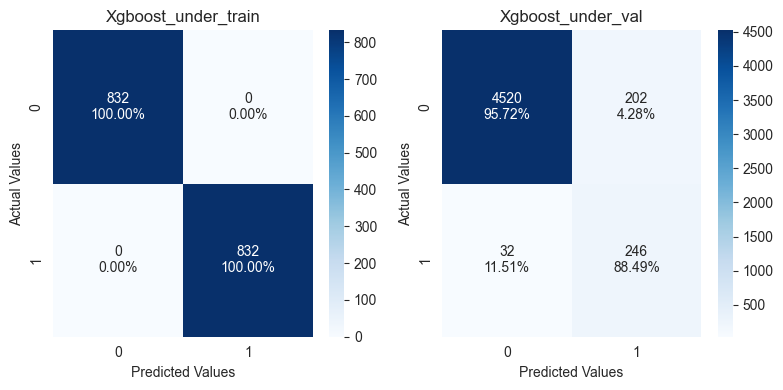

In [392]:

plot_cm_train_test(Xgboost_under, X_train_un, y_train_un, X_val, y_val, train_model_desc="Xgboost_under_train", test_model_desc="Xgboost_under_val")

**Notes**
* From all models over the **undersampled dataset**, the **XGBoost model have the best performance** (highest recall) and generalizes well on the **validation dataset**.
* RandomForest and GradientBoost have a slightly lower performance and do generalize as well as GradientBoost
* Model Building (7 models) with Undersampled data took less than 1 minute, makes sense is done almost inmediatedly, considering is a very small dataset as undersampling goes to 5.6% of rows.


## Consolidated notes on Model Building
* False negatives (FN) are real failures in a generator where there is no detection by model. We would want **Recall to be maximized** as greater the Recall, the higher the chances of **minimizing false negatives**.
* The sample code considers metric evaluation focused on a single metric with the cross_val_score function on the metric of interest (Recall in this case).
* The proposed code aims to evaluate multiple metrics (such as precision, recall, accuracy and F1 scores) using cross_validate function instead of cross_val_score.
* The proposed code follows the sample code evaluation method: After fitting the model to the training data, the model is evaluated directly on the validation set, this means that the performance is measured based on a single pass on the validation data after training.
* Proposed code as a function with outputs df_perf (dataframe with model performance metrics), train_results (raw cross validation results from train folds).
* For visualization, a function is proposed to have flexibility in terms of which models and metrics to visualize from the raw cross validation results from train folds.
* From all models over the **original dataset**, the **XGBoost model have the best performance** (highest recall) and generalizes well on the **validation dataset**.
* The fit_time, amount of time taken by the model to fit (train) on each fold during cross-validation is, for the best performer model, the second smallest across all models.
* The score_time, amount of time taken by the model to make predictions and evaluate the performance (scoring) on each fold during cross-validation is,  for the best performer model, the third greater across all models.
* Model Building (7 models) with Original data took 7 minutes.
* From all models over the **oversampled dataset**, the **GradientBoost model have the best performance** (highest recall) and generalizes well on the **validation dataset**.
* XGBoost tends to overfit on training data and do not generalize as well as GradientBoost
* Model Building (7 models) with Oversampled data took 13 minutes, makes sense it takes more time considering is a bigger dataset as oversampling goes from 5.6% of rows.
* From all models over the **undersampled dataset**, the **XGBoost model have the best performance** (highest recall) and generalizes well on the **validation dataset**.
* RandomForest and GradientBoost have a slightly lower performance and do generalize as well as GradientBoost
* Model Building (7 models) with Undersampled data took less than 1 minute, makes sense is done almost inmediatedly, considering is a very small dataset as undersampling goes to 5.6% of rows.

# HyperparameterTuning

In [402]:
# Consolidate into a single DataFrame
df_perf = pd.concat([df_perf_orig, df_perf_over, df_perf_under], axis=0)

# Reset the index
df_perf.reset_index(drop=True, inplace=True)

In [403]:
df_perf[(df_perf['Model'].str.contains("val"))].sort_values('Recall',ascending=False).head(10)

Model  Accuracy  Recall  Precision    F1
41             Xgboost_under_fit_val     0.953   0.885      0.549 0.678
39                 GBM_under_fit_val     0.937   0.881      0.463 0.607
37       Random forest_under_fit_val     0.944   0.881      0.500 0.638
25                  GBM_over_fit_val     0.966   0.878      0.646 0.744
40            Adaboost_under_fit_val     0.876   0.867      0.292 0.437
38             Bagging_under_fit_val     0.924   0.863      0.412 0.557
27              Xgboost_over_fit_val     0.987   0.860      0.909 0.884
35  LogisticRegression_under_fit_val     0.875   0.845      0.288 0.430
21   LogisticRegression_over_fit_val     0.882   0.838      0.299 0.441
36               dtree_under_fit_val     0.841   0.827      0.235 0.366

In [404]:
df_perf[(df_perf['Model'].str.contains("train"))].sort_values('Recall',ascending=False).head(10)

Model  Accuracy  Recall  Precision    F1
20             Xgboost_over_cv_train     0.992   0.991      0.994 0.992
16       Random forest_over_cv_train     0.990   0.984      0.996 0.990
17             Bagging_over_cv_train     0.983   0.978      0.987 0.982
15               dtree_over_cv_train     0.962   0.969      0.956 0.963
18                 GBM_over_cv_train     0.948   0.925      0.970 0.947
19            Adaboost_over_cv_train     0.909   0.901      0.916 0.908
30      Random forest_under_cv_train     0.924   0.897      0.948 0.921
32                GBM_under_cv_train     0.912   0.895      0.926 0.910
34            Xgboost_under_cv_train     0.927   0.895      0.956 0.925
14  LogisticRegression_over_cv_train     0.880   0.879      0.881 0.880

**Note**
* The three models considered as top three when prioritizing Recall are **XGBoost**, **Random Forest**, and **GBM**.
	1. **Xgboost** shows strong and consistent performance across all datasets, making it the most reliable choice when prioritizing Recall.
	2. **Random Forest** shows consistently strong performance, especially in the undersampled dataset where it has the second-highest Recall after XGBoost. It also performs well on the oversampled dataset.
	3. **GBM** is another strong alternative, particularly in the oversampled dataset where it achieves the highest Recall. It also performs comparably well in the undersampled dataset.
* Those models will be considered for hyperparameter tuning

## Samples

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

### Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

### Sample tuning method for Decision tree with undersampled data

In [401]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) 

# Set the clf to the best combination of parameters
XGBoost_orig_tuned = randomized_cv.best_estimator_
# Fit the best algorithm to the data.
XGBoost_orig_tuned.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 11} with CV score=0.5744462881465984:


## XGBoost Tuning

In [426]:
%%time

# defining model
XGBoost= XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
param_grid={ 'n_estimators': [150, 200, 250], 'scale_pos_weight': [5,10], 'learning_rate': [0.1,0.2], 'gamma': [0,3,5], 'subsample': [0.8,0.9] }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(estimator=XGBoost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

# Set the clf to the best combination of parameters
XGBoost_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
XGBoost_tuned.fit(X_train, y_train)

CPU times: total: 12.8 s
Wall time: 55.9 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

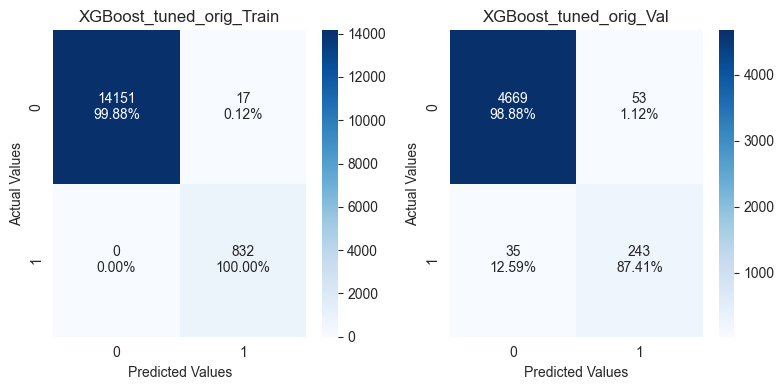

In [448]:

plot_cm_train_test(XGBoost_tuned, X_train, y_train, X_val, y_val, train_model_desc="XGBoost_tuned_orig_Train", test_model_desc="XGBoost_tuned_orig_Val")
    

In [439]:
# inicialize clasification performance dataframe
df_perf_Hyp = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "F1"])

In [440]:
df_perf_Hyp=classification_performance(XGBoost_tuned, 'orig_train', X_train, y_train, df_perf_Hyp)
df_perf_Hyp=classification_performance(XGBoost_tuned, 'orig_val', X_val, y_val, df_perf_Hyp)
df_perf_Hyp

Model  Accuracy  Recall  Precision    F1
0  XGBClassifier_orig_train     0.998   1.000      0.971 0.985
1    XGBClassifier_orig_val     0.988   0.835      0.939 0.884

In [442]:
%%time

# defining model
XGBoost= XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
param_grid={ 'n_estimators': [150, 200, 250], 'scale_pos_weight': [5,10], 'learning_rate': [0.1,0.2], 'gamma': [0,3,5], 'subsample': [0.8,0.9] }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(estimator=XGBoost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

# Set the clf to the best combination of parameters
XGBoost_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
XGBoost_tuned.fit(X_train_over, y_train_over)

CPU times: total: 31.9 s
Wall time: 1min 34s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

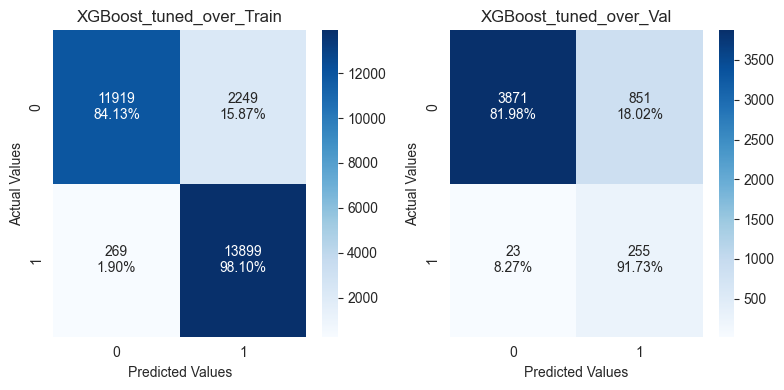

In [458]:

plot_cm_train_test(XGBoost_tuned, X_train_over, y_train_over, X_val, y_val, train_model_desc="XGBoost_tuned_over_Train", test_model_desc="XGBoost_tuned_over_Val")


In [443]:
df_perf_Hyp=classification_performance(XGBoost_tuned, 'over_train', X_train_over, y_train_over, df_perf_Hyp)
df_perf_Hyp=classification_performance(XGBoost_tuned, 'over_val', X_val, y_val, df_perf_Hyp)
df_perf_Hyp

Model  Accuracy  Recall  Precision    F1
0  XGBClassifier_orig_train     0.998   1.000      0.971 0.985
1    XGBClassifier_orig_val     0.988   0.835      0.939 0.884
2  XGBClassifier_over_train     0.999   1.000      0.999 0.999
3    XGBClassifier_over_val     0.982   0.874      0.821 0.847

In [450]:
%%time

# defining model
XGBoost= XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
param_grid={ 'n_estimators': [150, 200, 250], 'scale_pos_weight': [5,10], 'learning_rate': [0.1,0.2], 'gamma': [0,3,5], 'subsample': [0.8,0.9] }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(estimator=XGBoost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

# Set the clf to the best combination of parameters
XGBoost_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
XGBoost_tuned.fit(X_train_un, y_train_un)

CPU times: total: 4.91 s
Wall time: 22.1 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

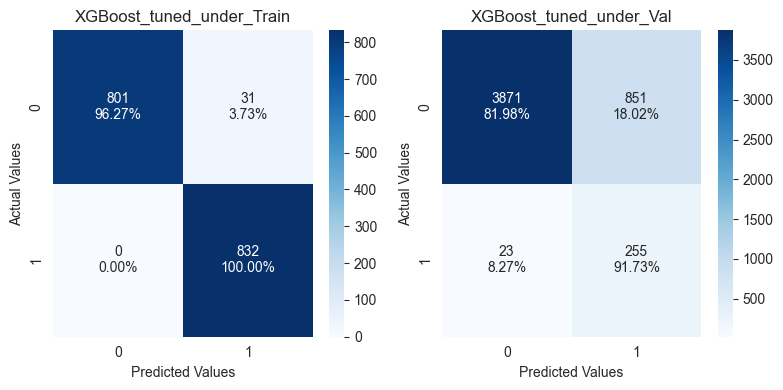

In [457]:

plot_cm_train_test(XGBoost_tuned, X_train_un, y_train_un, X_val, y_val, train_model_desc="XGBoost_tuned_under_Train", test_model_desc="XGBoost_tuned_under_Val")


In [451]:
df_perf_Hyp=classification_performance(XGBoost_tuned, 'under_train', X_train_un, y_train_un, df_perf_Hyp)
df_perf_Hyp=classification_performance(XGBoost_tuned, 'under_val', X_val, y_val, df_perf_Hyp)
df_perf_Hyp

Model  Accuracy  Recall  Precision    F1
0   XGBClassifier_orig_train     0.998   1.000      0.971 0.985
1     XGBClassifier_orig_val     0.988   0.835      0.939 0.884
2   XGBClassifier_over_train     0.999   1.000      0.999 0.999
3     XGBClassifier_over_val     0.982   0.874      0.821 0.847
4  XGBClassifier_under_train     0.981   1.000      0.964 0.982
5    XGBClassifier_under_val     0.825   0.917      0.231 0.368

In [455]:
df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("val"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
5  XGBClassifier_under_val     0.825   0.917      0.231 0.368
3   XGBClassifier_over_val     0.982   0.874      0.821 0.847
1   XGBClassifier_orig_val     0.988   0.835      0.939 0.884

In [456]:
df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("train"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
0   XGBClassifier_orig_train     0.998   1.000      0.971 0.985
2   XGBClassifier_over_train     0.999   1.000      0.999 0.999
4  XGBClassifier_under_train     0.981   1.000      0.964 0.982

**Notes**
* XGBClassifier hyperparameter tuning done considering original, oversampled and undersampled datasets.
* The best performance is achieved with **XGBClassifier_tuned over Undersampled** data. 

## Random Forest Tuning

In [459]:
%%time

# defining model
RForest= RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = { "n_estimators": [200,250,300], "min_samples_leaf": np.arange(1, 4), "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], "max_samples": np.arange(0.4, 0.7, 0.1) }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(estimator=RForest, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

# Set the clf to the best combination of parameters
RForest_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
RForest_tuned.fit(X_train, y_train)

CPU times: total: 1min 16s
Wall time: 8min 22s


RandomForestClassifier(max_samples=0.6, n_estimators=250, random_state=1)

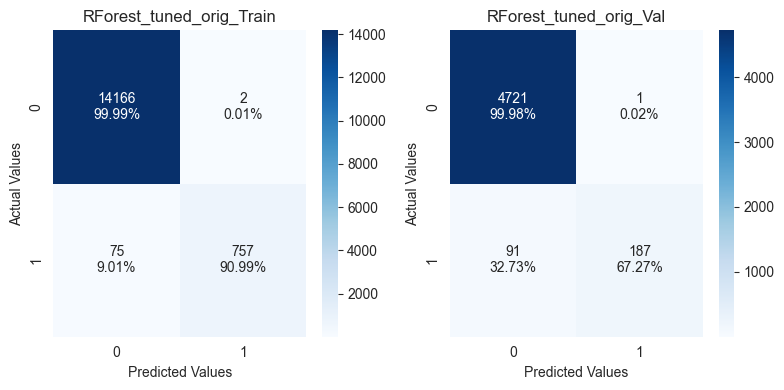

In [460]:

plot_cm_train_test(RForest_tuned, X_train, y_train, X_val, y_val, train_model_desc="RForest_tuned_orig_Train", test_model_desc="RForest_tuned_orig_Val")

In [464]:
df_perf_Hyp=classification_performance(RForest_tuned, 'orig_train', X_train, y_train, df_perf_Hyp)
df_perf_Hyp=classification_performance(RForest_tuned, 'orig_val', X_val, y_val, df_perf_Hyp)

In [470]:

df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("val"))&(df_perf_Hyp['Model'].str.contains("Forest"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
7  RandomForestClassifier_orig_val     0.982   0.673      0.995 0.803

In [471]:

df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("train"))&(df_perf_Hyp['Model'].str.contains("Forest"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
6  RandomForestClassifier_orig_train     0.954   0.910      0.999 0.952

In [474]:
%%time

# defining model
RForest= RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = { "n_estimators": [200,250,300], "min_samples_leaf": np.arange(1, 4), "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], "max_samples": np.arange(0.4, 0.7, 0.1) }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(estimator=RForest, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

# Set the clf to the best combination of parameters
RForest_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
RForest_tuned.fit(X_train_over, y_train_over)

CPU times: total: 2min 2s
Wall time: 12min 16s


RandomForestClassifier(max_samples=0.6, n_estimators=300, random_state=1)

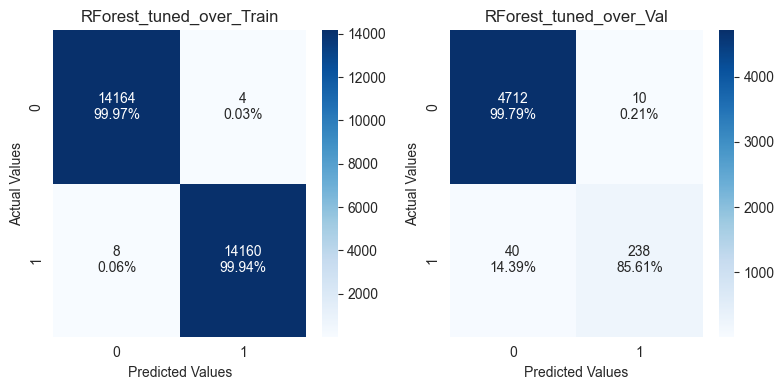

In [475]:

plot_cm_train_test(RForest_tuned, X_train_over, y_train_over, X_val, y_val, train_model_desc="RForest_tuned_over_Train", test_model_desc="RForest_tuned_over_Val")

In [476]:
df_perf_Hyp=classification_performance(RForest_tuned, 'over_train', X_train_over, y_train_over, df_perf_Hyp)
df_perf_Hyp=classification_performance(RForest_tuned, 'over_val', X_val, y_val, df_perf_Hyp)

In [477]:

df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("val"))&(df_perf_Hyp['Model'].str.contains("Forest"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
9  RandomForestClassifier_over_val     0.990   0.856      0.960 0.905
7  RandomForestClassifier_orig_val     0.982   0.673      0.995 0.803

In [478]:

df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("train"))&(df_perf_Hyp['Model'].str.contains("Forest"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
8  RandomForestClassifier_over_train     1.000   0.999      1.000 1.000
6  RandomForestClassifier_orig_train     0.954   0.910      0.999 0.952

In [479]:
%%time

# defining model
RForest= RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = { "n_estimators": [200,250,300], "min_samples_leaf": np.arange(1, 4), "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], "max_samples": np.arange(0.4, 0.7, 0.1) }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(estimator=RForest, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

# Set the clf to the best combination of parameters
RForest_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
RForest_tuned.fit(X_train_un, y_train_un)

CPU times: total: 5.64 s
Wall time: 39 s


RandomForestClassifier(max_samples=0.6, n_estimators=300, random_state=1)

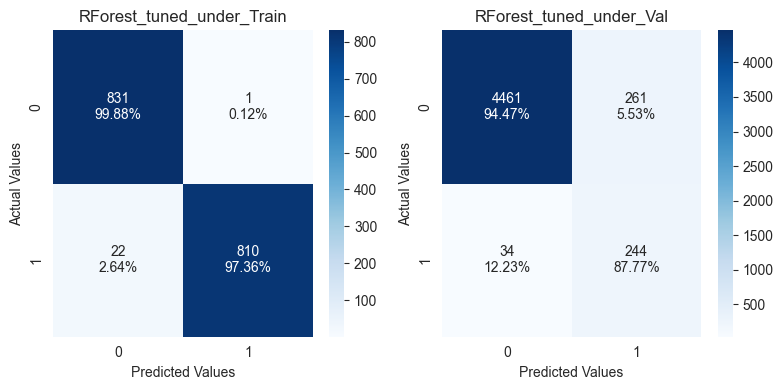

In [480]:

plot_cm_train_test(RForest_tuned, X_train_un, y_train_un, X_val, y_val, train_model_desc="RForest_tuned_under_Train", test_model_desc="RForest_tuned_under_Val")

In [481]:
df_perf_Hyp=classification_performance(RForest_tuned, 'under_train', X_train_un, y_train_un, df_perf_Hyp)
df_perf_Hyp=classification_performance(RForest_tuned, 'under_val', X_val, y_val, df_perf_Hyp)

In [482]:

df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("val"))&(df_perf_Hyp['Model'].str.contains("Forest"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
11  RandomForestClassifier_under_val     0.941   0.878      0.483 0.623
9    RandomForestClassifier_over_val     0.990   0.856      0.960 0.905
7    RandomForestClassifier_orig_val     0.982   0.673      0.995 0.803

In [483]:

df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("train"))&(df_perf_Hyp['Model'].str.contains("Forest"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
8    RandomForestClassifier_over_train     1.000   0.999      1.000 1.000
10  RandomForestClassifier_under_train     0.986   0.974      0.999 0.986
6    RandomForestClassifier_orig_train     0.954   0.910      0.999 0.952

**Notes**
* RandomForestClassifier hyperparameter tuning done considering original, oversampled and undersampled datasets.
* The best performance is achieved with **RandomForestClassifier_tuned over Undersampled** data.

## Gradient Boost Tuning

In [484]:
%%time

# defining model
GBM= GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(estimator=GBM, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

# Set the clf to the best combination of parameters
GBM_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
GBM_tuned.fit(X_train, y_train)

CPU times: total: 35.5 s
Wall time: 5min 30s


GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.7)

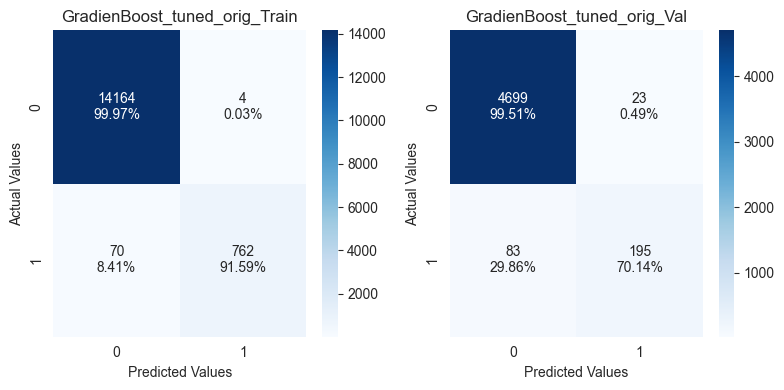

In [485]:

plot_cm_train_test(GBM_tuned, X_train, y_train, X_val, y_val, train_model_desc="GradienBoost_tuned_orig_Train", test_model_desc="GradienBoost_tuned_orig_Val")

In [486]:
df_perf_Hyp=classification_performance(GBM_tuned, 'orig_train', X_train, y_train, df_perf_Hyp)
df_perf_Hyp=classification_performance(GBM_tuned, 'orig_val', X_val, y_val, df_perf_Hyp)

In [487]:

df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("val"))&(df_perf_Hyp['Model'].str.contains("Gradient"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
13  GradientBoostingClassifier_orig_val     0.979   0.701      0.894 0.786

In [488]:

df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("train"))&(df_perf_Hyp['Model'].str.contains("Gradient"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
12  GradientBoostingClassifier_orig_train     0.995   0.916      0.995 0.954

In [489]:
%%time

# defining model
GBM= GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(estimator=GBM, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

# Set the clf to the best combination of parameters
GBM_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
GBM_tuned.fit(X_train_over, y_train_over)

CPU times: total: 55 s
Wall time: 10min 4s


GradientBoostingClassifier(learning_rate=1, max_features=0.5, random_state=1,
                           subsample=0.7)

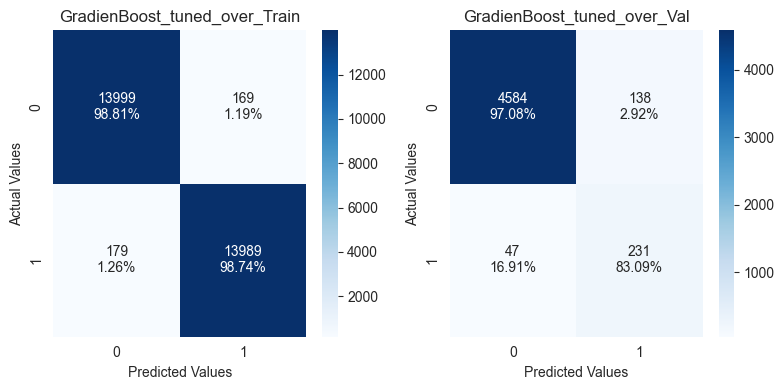

In [490]:

plot_cm_train_test(GBM_tuned, X_train_over, y_train_over, X_val, y_val, train_model_desc="GradienBoost_tuned_over_Train", test_model_desc="GradienBoost_tuned_over_Val")

In [491]:
df_perf_Hyp=classification_performance(GBM_tuned, 'over_train', X_train_over, y_train_over, df_perf_Hyp)
df_perf_Hyp=classification_performance(GBM_tuned, 'over_val', X_val, y_val, df_perf_Hyp)

In [492]:

df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("val"))&(df_perf_Hyp['Model'].str.contains("Gradient"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
15  GradientBoostingClassifier_over_val     0.963   0.831      0.626 0.714
13  GradientBoostingClassifier_orig_val     0.979   0.701      0.894 0.786

In [493]:

df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("train"))&(df_perf_Hyp['Model'].str.contains("Gradient"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
14  GradientBoostingClassifier_over_train     0.988   0.987      0.988 0.988
12  GradientBoostingClassifier_orig_train     0.995   0.916      0.995 0.954

In [494]:
%%time

# defining model
GBM= GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(estimator=GBM, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

# Set the clf to the best combination of parameters
GBM_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
GBM_tuned.fit(X_train_un, y_train_un)

CPU times: total: 3.75 s
Wall time: 35.6 s


GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.7)

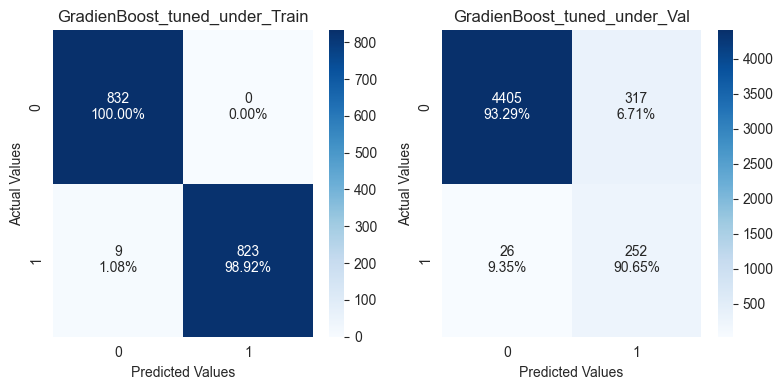

In [495]:

plot_cm_train_test(GBM_tuned, X_train_un, y_train_un, X_val, y_val, train_model_desc="GradienBoost_tuned_under_Train", test_model_desc="GradienBoost_tuned_under_Val")

In [496]:
df_perf_Hyp=classification_performance(GBM_tuned, 'under_train', X_train_un, y_train_un, df_perf_Hyp)
df_perf_Hyp=classification_performance(GBM_tuned, 'under_val', X_val, y_val, df_perf_Hyp)

In [497]:

df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("val"))&(df_perf_Hyp['Model'].str.contains("Gradient"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
17  GradientBoostingClassifier_under_val     0.931   0.906      0.443 0.595
15   GradientBoostingClassifier_over_val     0.963   0.831      0.626 0.714
13   GradientBoostingClassifier_orig_val     0.979   0.701      0.894 0.786

In [498]:

df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("train"))&(df_perf_Hyp['Model'].str.contains("Gradient"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
16  GradientBoostingClassifier_under_train     0.995   0.989      1.000 0.995
14   GradientBoostingClassifier_over_train     0.988   0.987      0.988 0.988
12   GradientBoostingClassifier_orig_train     0.995   0.916      0.995 0.954

**Notes**
* GradientBoostingClassifier hyperparameter tuning done considering original, oversampled and undersampled datasets.
* The best performance is achieved with **GradientBoostingClassifier_tuned over Undersampled** data


## Consolidated notes on HyperparameterTuning

* The three models considered as top three when prioritizing Recall are **XGBoost**, **Random Forest**, and **GBM**.
	1. **Xgboost** shows strong and consistent performance across all datasets, making it the most reliable choice when prioritizing Recall.
	2. **Random Forest** shows consistently strong performance, especially in the undersampled dataset where it has the second-highest Recall after XGBoost. It also performs well on the oversampled dataset.
	3. **GBM** is another strong alternative, particularly in the oversampled dataset where it achieves the highest Recall. It also performs comparably well in the undersampled dataset.
* Those models will be considered for hyperparameter tuning
* XGBClassifier hyperparameter tuning done considering original, oversampled and undersampled datasets.
* The best performance is achieved with **XGBClassifier_tuned over Undersampled** data. 
* RandomForestClassifier hyperparameter tuning done considering original, oversampled and undersampled datasets.
* The best performance is achieved with **RandomForestClassifier_tuned over Undersampled** data. 
* GradientBoostingClassifier hyperparameter tuning done considering original, oversampled and undersampled datasets.
* The best performance is achieved with **GradientBoostingClassifier_tuned over Undersampled** data.


# Model performance comparison and choosing the final model

In [499]:

df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("val"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
5                XGBClassifier_under_val     0.825   0.917      0.231 0.368
17  GradientBoostingClassifier_under_val     0.931   0.906      0.443 0.595
11      RandomForestClassifier_under_val     0.941   0.878      0.483 0.623
3                 XGBClassifier_over_val     0.982   0.874      0.821 0.847
9        RandomForestClassifier_over_val     0.990   0.856      0.960 0.905
1                 XGBClassifier_orig_val     0.988   0.835      0.939 0.884
15   GradientBoostingClassifier_over_val     0.963   0.831      0.626 0.714
13   GradientBoostingClassifier_orig_val     0.979   0.701      0.894 0.786
7        RandomForestClassifier_orig_val     0.982   0.673      0.995 0.803

In [500]:

df_perf_Hyp[(df_perf_Hyp['Model'].str.contains("train"))].sort_values('Recall',ascending=False)

Model  Accuracy  Recall  Precision    F1
0                 XGBClassifier_orig_train     0.998   1.000      0.971 0.985
2                 XGBClassifier_over_train     0.999   1.000      0.999 0.999
4                XGBClassifier_under_train     0.981   1.000      0.964 0.982
8        RandomForestClassifier_over_train     1.000   0.999      1.000 1.000
16  GradientBoostingClassifier_under_train     0.995   0.989      1.000 0.995
14   GradientBoostingClassifier_over_train     0.988   0.987      0.988 0.988
10      RandomForestClassifier_under_train     0.986   0.974      0.999 0.986
12   GradientBoostingClassifier_orig_train     0.995   0.916      0.995 0.954
6        RandomForestClassifier_orig_train     0.954   0.910      0.999 0.952

**Notes**

* The three models considered Hyperparameter Tuning are **XGBoost**, **Random Forest**, and **GBM**.
* Hyperparameter tuning done considering original, oversampled and undersampled datasets.
* The best performance among tuned models is achieved with **XGBClassifier_tuned over Undersampled** data.

## Test set final performance

In [502]:
%%time

# defining model
XGBoost= XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
param_grid={ 'n_estimators': [150, 200, 250], 'scale_pos_weight': [5,10], 'learning_rate': [0.1,0.2], 'gamma': [0,3,5], 'subsample': [0.8,0.9] }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(estimator=XGBoost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

# Set the clf to the best combination of parameters
XGBoost_tuned_un = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
XGBoost_tuned_un.fit(X_train_un, y_train_un)

CPU times: total: 4.88 s
Wall time: 19.8 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [529]:
randomized_cv.best_params_

{'subsample': 0.8,
 'scale_pos_weight': 10,
 'n_estimators': 200,
 'learning_rate': 0.1,
 'gamma': 5}

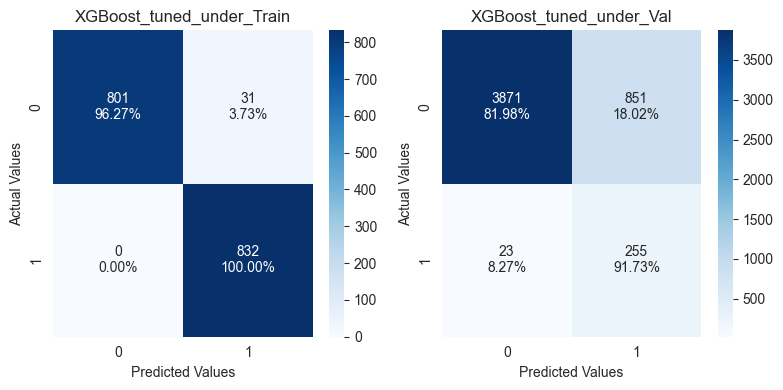

In [504]:

plot_cm_train_test(XGBoost_tuned_un, X_train_un, y_train_un, X_val, y_val, train_model_desc="XGBoost_tuned_under_Train", test_model_desc="XGBoost_tuned_under_Val")


In [609]:
df_perf_final=[]

In [610]:
df_perf_final=classification_performance(XGBoost_tuned, 'under_train', X_train_un, y_train_un, df_perf=None)
df_perf_final=classification_performance(XGBoost_tuned, 'under_val', X_val, y_val, df_perf_final)
df_perf_final

Model  Accuracy  Recall  Precision    F1
0  XGBClassifier_under_train     0.981   1.000      0.964 0.982
1    XGBClassifier_under_val     0.825   0.917      0.231 0.368

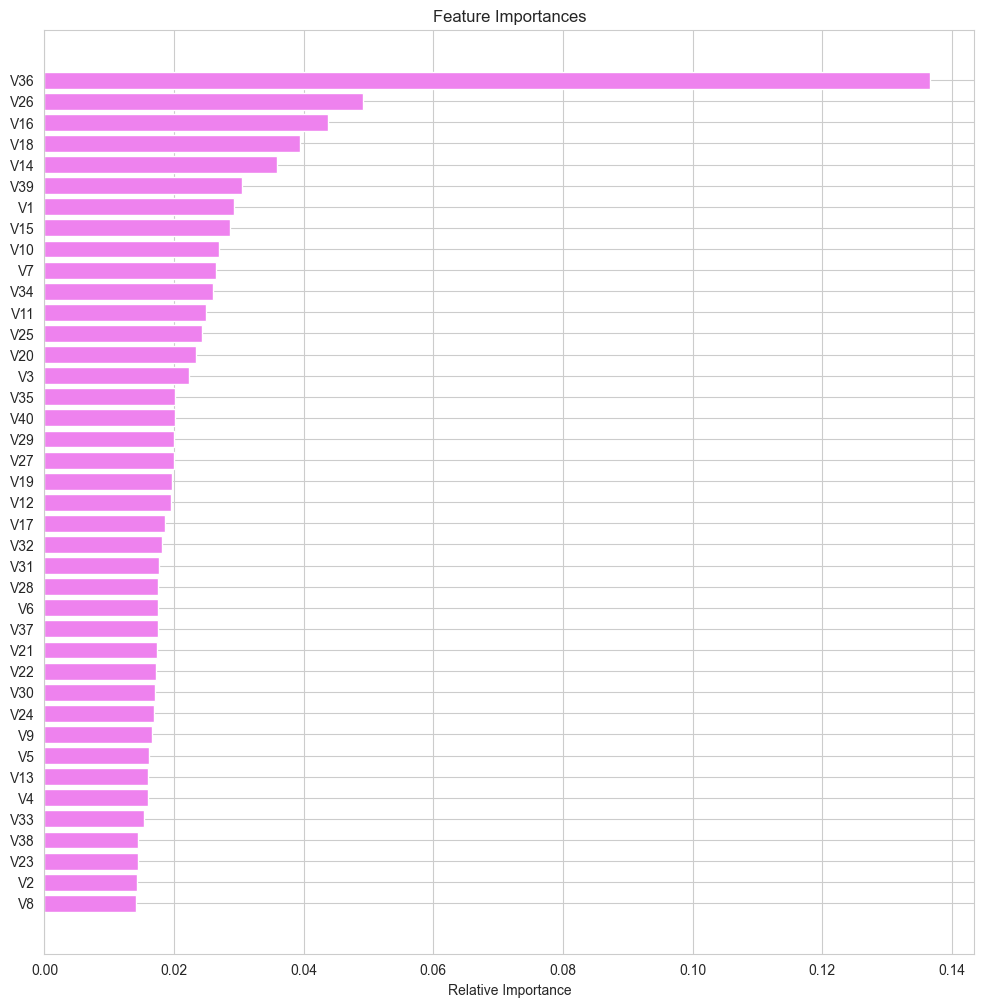

In [503]:
# Checking the feature importance
feature_names = X_train.columns
importances = XGBoost_tuned_un.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [510]:
important_var = pd.DataFrame({'feature_names': X_train.columns, 'mportances' :XGBoost_tuned_un.feature_importances_})

In [528]:
important_var.sort_values('mportances', ascending=False).head(5)

feature_names  mportances
35           V36       0.137
25           V26       0.049
15           V16       0.044
17           V18       0.039
13           V14       0.036

In [514]:
sorted_corr_v1 = sorted_corr.merge(important_var, left_on='variable1', right_on='feature_names', how='left')
sorted_corr_v1 = sorted_corr_v1.rename(columns={'mportances': 'importance_v1'})

In [519]:
sorted_corr_v2 = sorted_corr_v1.merge(important_var, left_on='variable2', right_on='feature_names', how='left')
sorted_corr_v2 = sorted_corr_v2.rename(columns={'mportances': 'importance_v2'})

In [521]:
sorted_corr_v2['importance_corr'] = sorted_corr_v2['importance_v1'] + sorted_corr_v2['importance_v2']

In [526]:
sorted_corr_v2[sorted_corr_v2['corr_lvl']=="High"].sort_values('importance_corr',ascending=False)

variable1 variable2  correlation corr_lvl feature_names_x  importance_v1  \
8         V36       V39        0.752     High             V36          0.137   
5          V2       V26        0.787     High              V2          0.014   
1         V16       V21        0.837     High             V16          0.044   
813        V9       V16       -0.753     High              V9          0.017   
4          V8       V16        0.803     High              V8          0.014   
0          V7       V15        0.868     High              V7          0.027   
815       V14       V38       -0.763     High             V14          0.036   
819        V2       V14       -0.854     High              V2          0.014   
7         V19       V34        0.756     High             V19          0.020   
3         V11       V29        0.811     High             V11          0.025   
6         V25       V27        0.766     High             V25          0.024   
10         V6       V11        0.710     High              V6          0.018   
811       V25       V32       -0.711     High             V25          0.024   
816       V25       V30       -0.765     High             V25          0.024   
812       V25       V33       -0.735     High             V25          0.024   
810       V17       V27       -0.707     High             V17          0.019   
817       V27       V32       -0.766     High             V27          0.020   
809       V21       V35       -0.700     High             V21          0.017   
814       V24       V27       -0.755     High             V24          0.017   
818        V3       V23       -0.786     High              V3          0.022   
2         V24       V32        0.825     High             V24          0.017   
9          V8       V23        0.718     High              V8          0.014   

    feature_names_y  importance_v2  importance_corr  
8               V39          0.030            0.167  
5               V26          0.049            0.063  
1               V21          0.017            0.061  
813             V16          0.044            0.060  
4               V16          0.044            0.058  
0               V15          0.029            0.055  
815             V38          0.014            0.050  
819             V14          0.036            0.050  
7               V34          0.026            0.046  
3               V29          0.020            0.045  
6               V27          0.020            0.044  
10              V11          0.025            0.043  
811             V32          0.018            0.042  
816             V30          0.017            0.041  
812             V33          0.015            0.040  
810             V27          0.020            0.039  
817             V32          0.018            0.038  
809             V35          0.020            0.038  
814             V27          0.020            0.037  
818             V23          0.014            0.037  
2               V32          0.018            0.035  
9               V23          0.014            0.029

**Notes**
* The **most important variable is V36** (13.7%), followed by V26 (4.9%), V16(4.4%), V18(3.9%) and V14(3.6%) for the top 5 important variables.
* The variables V36 and V39 present high correlation and is the correlation with biggest importance (16.7%) followed by V2-V26 (6.3%) and V16-V21 (6.1%) for the top 3 important correlations.


## Pipelines to build the final model

In [604]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [605]:
# Define the imputer for missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="mean")

# Define RandomUnderSampler for undersampling the majority class
under_sampler = RandomUnderSampler(random_state=1)

# Define the XGBoost model with specified parameters
xgb_model = XGBClassifier(
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.1,
    gamma=5,
    random_state=1,
)


In [606]:
# Create the pipeline
XGB_Pipeline_2 = Pipeline(steps=[
    ('imputer', imp_mode),  # Step 1: Imputation
    ('model', xgb_model)    # Step 2: XGBoost Model
])

In [607]:
XGB_Pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

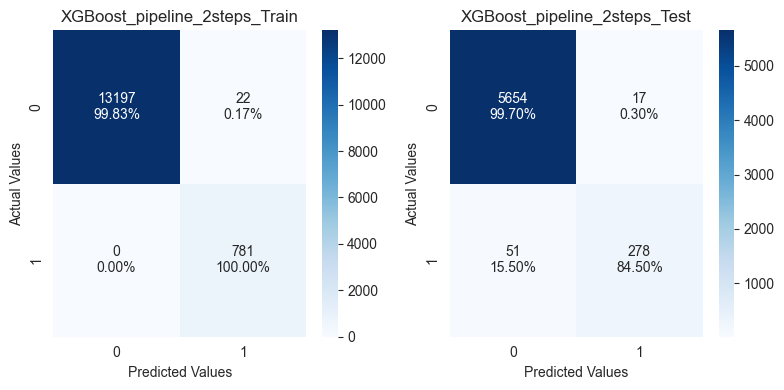

In [608]:

plot_cm_train_test(XGB_Pipeline_2, X_train, y_train, X_test, y_test, train_model_desc="XGBoost_pipeline_2steps_Train", test_model_desc="XGBoost_pipeline_2steps_Test")


In [611]:
df_perf_final=classification_performance(XGB_Pipeline_2, 'orig_train', X_train_un, y_train_un, df_perf_final)
df_perf_final=classification_performance(XGB_Pipeline_2, 'orig_test', X_test, y_test, df_perf_final)
df_perf_final

Model  Accuracy  Recall  Precision    F1
0  XGBClassifier_under_train     0.981   1.000      0.964 0.982
1    XGBClassifier_under_val     0.825   0.917      0.231 0.368
2        Pipeline_orig_train     0.996   0.994      0.998 0.996
3         Pipeline_orig_test     0.989   0.845      0.942 0.891

**Notes**
* Pipeline_orig include **two steps**: SimpleImputer and XGBClassifier.
	1. SimpleImputer applied to correct missing values.
	2. XGBClassifier consider tuned hyperparameters.
* Pipeline_orig have a **high recall** (0.845)
* Pipeline_orig present a **high precision** (0.942)
* Pipeline_orig present a **high F1 score** (0.891)
* Pipeline_orig present a **generalized performance**


In [612]:
# Create the pipeline
XGB_Pipeline_3 = Pipeline(steps=[
    ('imputer', imp_mode),  # Step 1: Imputation
    ('under_sampler', under_sampler), # Step 2: Undersampling
    ('model', xgb_model)    # Step 3: XGBoost Model
])

In [613]:
XGB_Pipeline_3.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('under_sampler', RandomUnderSampler(random_state=1)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

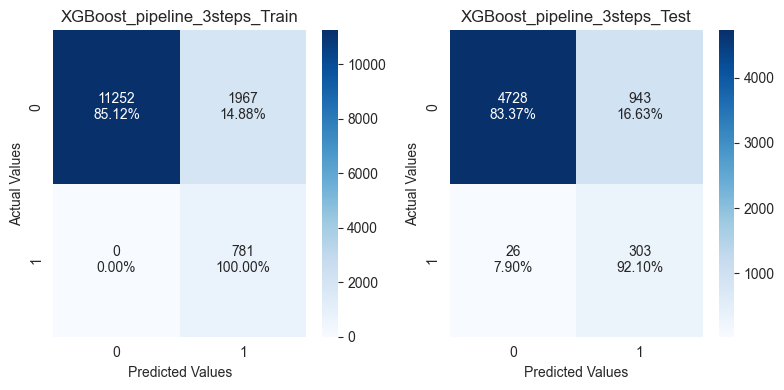

In [618]:

plot_cm_train_test(XGB_Pipeline_3, X_train, y_train, X_test, y_test, train_model_desc="XGBoost_pipeline_3steps_Train", test_model_desc="XGBoost_pipeline_3steps_Test")


In [615]:
df_perf_final=classification_performance(XGB_Pipeline_3, 'under_train', X_train_un, y_train_un, df_perf_final)
df_perf_final=classification_performance(XGB_Pipeline_3, 'under_test', X_test, y_test, df_perf_final)
df_perf_final

Model  Accuracy  Recall  Precision    F1
0  XGBClassifier_under_train     0.981   1.000      0.964 0.982
1    XGBClassifier_under_val     0.825   0.917      0.231 0.368
2        Pipeline_orig_train     0.996   0.994      0.998 0.996
3         Pipeline_orig_test     0.989   0.845      0.942 0.891
4       Pipeline_under_train     0.915   0.998      0.856 0.921
5        Pipeline_under_test     0.839   0.921      0.243 0.385

**Notes**
* Pipeline_under include **three steps**: SimpleImputer, RandomUnderSampler and XGBClassifier.
	1. SimpleImputer applied to correct missing values.
	2. RandomUnderSampler applied considering data unbalance, and model performance with undersampling.
	3. XGBClassifier consider tuned hyperparameters.
* Pipeline_under achieved **the highest recall** (0.921), indicating its ability to identify nearly all positive cases.
* Pipeline_under present a **very low precision** (0.243)
* Pipeline_under present a **very low F1 score** (0.385)
* Pipeline_under present some degree of **overfitting**



## Consolidated notes on Model performance comparison

* The three models considered Hyperparameter Tuning are **XGBoost**, **Random Forest**, and **GBM**.
* Hyperparameter tuning done considering original, oversampled and undersampled datasets.
* The best performance among tuned models is achieved with **XGBClassifier_tuned over Undersampled** data.
* The **most important variable is V36** (13.7%), followed by V26 (4.9%), V16(4.4%), V18(3.9%) and V14(3.6%) for the top 5 important variables.
* The variables V36 and V39 present high correlation and is the correlation with biggest importance (16.7%) followed by V2-V26 (6.3%) and V16-V21 (6.1%) for the top 3 important correlations.
* Pipeline_orig include **two steps**: SimpleImputer and XGBClassifier.
	1. SimpleImputer applied to correct missing values.
	2. XGBClassifier consider tuned hyperparameters.
* Pipeline_orig have a **high recall** (0.845)
* Pipeline_orig present a **high precision** (0.942)
* Pipeline_orig present a **high F1 score** (0.891)
* Pipeline_orig present a **generalized performance**
* Pipeline_under include **three steps**: SimpleImputer, RandomUnderSampler and XGBClassifier.
	1. SimpleImputer applied to correct missing values.
	2. RandomUnderSampler applied considering data unbalance, and model performance with undersampling.
	3. XGBClassifier consider tuned hyperparameters.
* Pipeline_under achieved **the highest recall** (0.921), indicating its ability to identify nearly all positive cases.
* Pipeline_under present a **very low precision** (0.243)
* Pipeline_under present a **very low F1 score** (0.385)
* Pipeline_under present some degree of **overfitting**

# Business Insights and Conclusions


* The goal is to find a ML model that helps predict failures so that generators can be repaired before they fail or break, reducing the overall maintenance cost.
* The first thing to consider is the imbalanced nature of the data, with a low failure rate in the dataset (5.6%).
* The best model is considered to be the one with the lowest number of false negatives (FN), i.e. real failures that the model does not detect. These cases will generate replacement costs after the unforeseen failure occurs.
* In this context, 7 models were considered and evaluated with three versions of data (original, undersampled and oversampled), for a total of 21 model versions evaluated and ranked to select the three best performing models.
* The best performing models were then fine-tuned, again considering three versions of data, for a total of 9 model versions evaluated to select the best performing model.
* Two pipeline models are proposed for consideration in production:
	1. **Model 1**. Called "Pipeline_orig" because it considers the original data version. This model can predict most failures (84.5%) with high accuracy (94.2%). This model produces few failure predictions where there are no failures (0.3%), while missing some real, unforeseen failures (15.5%).
	2. **Model 2**. This model is called “Pipeline_under” because it considers an undersampled version of the data. This model can predict almost all failures (92.1%) with low accuracy (24.3%). This model produces many failure predictions where there are none (16.6%), while missing few real, unforeseen failures (7.9%).
* The final choice of the model must consider a detailed analysis of the costs based on the different types of maintenance costs:
	1. Inspection Costs (IC): cost of dealing with failures predicted in cases where there is no failure (False Positives)
	2. Repair Costs (RC): cost of dealing with failures correctly predicted by the model (True Positives)
	3. Change Costs (CC): cost of dealing with real failures where there is no detection by the model (False Negatives)
	4. It is given that IC << RC <<< CC
* Ultimately, the choice should depend on the specific application and model tolerance:
	1. Model 1 costs can be summarized as 0.003xIC + 0.845xRC + 0.155xCC
	2. Model 2 costs can be summarized as 0.166xIC + 0.921xRC + 0.079xCC
* **Model 2 is the recommended model** for production as it can predict almost all failures (92.1%) with a very low rate (7.9%) of undetected actual failures, having an **efficient ratio between failure prediction and related maintenance costs**.

In [623]:
#create html version
!jupyter nbconvert --to html MT_Project_LearnerNotebook_FullCode_CarlosM.ipynb

[NbConvertApp] Converting notebook MT_Project_LearnerNotebook_FullCode_CarlosM.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 32 image(s).
[NbConvertApp] Writing 6681501 bytes to MT_Project_LearnerNotebook_FullCode_CarlosM.html
